# **PROYECTO TURKISH SUPER LEAGUE**




Este dataset incluye todos los partidos de la Superliga turca. Información sobre jornadas, resultados de medio tiempo y tiempo completo, tarjetas rojas.
Como objetivo del análisis, pretendemos predecir el resultado de futuros partidos a desarrollarse en esta liga.

In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import urllib.request
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import seaborn as sb
%matplotlib inline
from xgboost import XGBClassifier
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency 
import statistics
import plotly.express as px

In [2]:
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-tlcjgq5r
  Running command git clone -q https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-tlcjgq5r
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)
  Created wheel for scikit-optimize: filename=scikit_optimize-0.9.0-py2.py3-none-any.whl size=100268 sha256=b115b3d2c8d77a7ef845a1e1e8d115a3fdef4dc0ea9aff765efb268aa5933d29
  Stored in directory: /tmp/pip-ephem-wheel-cache-pdxbu925/wheels/d6/9e/e3/8818f5597f06caa60393811f8aa57eb87b8565d772046d1b72
Successfully built scikit-optimize


In [3]:
from skopt import BayesSearchCV

In [4]:
df = pd.read_csv('tsl_dataset.csv') #CARGAMOS EL DATASET
df.tail()

,Date,Season,Week,home,visitor,FT,hgoal,vgoal,division,tier,...,HT,hgoal_half,vgoal_half,half_totgoal,half_goaldiff,result_half,fans,neutral,home_red_card,visitor_red_card
18074,10/01/2021,2020,18,Caykur Rizespor,Denizlispor,1-1,1,1,T1,1,...,0-1,0,1,1,-1,A,0,0,0,0
18075,10/01/2021,2020,18,Hatayspor,Besiktas,2-2,2,2,T1,1,...,2-2,2,2,4,0,D,0,0,0,0
18076,11/01/2021,2020,18,BB Erzurumspor,Fenerbahce,0-3,0,3,T1,1,...,0-1,0,1,1,-1,A,0,0,0,0
18077,11/01/2021,2020,18,Alanyaspor,Kasimpasa,1-2,1,2,T1,1,...,1-2,1,2,3,-1,A,0,0,0,1
18078,15/01/2021,2020,19,Genclerbirligi,Fatih Karagumruk,1-3,1,3,T1,1,...,0-2,0,2,2,-2,A,0,0,0,0


In [5]:
df.shape #REALIZAMOS SHAPE PARA DETERMINAS LAS FILAS Y COLUMNAS

(18079, 23)

El dataset tiene 18.079 filas y 23 columnas

In [6]:
df.isna().sum() #el dataset no tiene datos nulos

Date                0
Season              0
Week                0
home                0
visitor             0
FT                  0
hgoal               0
vgoal               0
division            0
tier                0
totgoal             0
goaldiff            0
result              0
HT                  0
hgoal_half          0
vgoal_half          0
half_totgoal        0
half_goaldiff       0
result_half         0
fans                0
neutral             0
home_red_card       0
visitor_red_card    0
dtype: int64

No tiene datos nulos

In [7]:
df.dtypes #Tipo de datos que contiene el dataset

Date                object
Season               int64
Week                 int64
home                object
visitor             object
FT                  object
hgoal                int64
vgoal                int64
division            object
tier                 int64
totgoal              int64
goaldiff             int64
result              object
HT                  object
hgoal_half           int64
vgoal_half           int64
half_totgoal         int64
half_goaldiff        int64
result_half         object
fans                 int64
neutral              int64
home_red_card        int64
visitor_red_card     int64
dtype: object

Tenemos una variable fecha, Season (temporada), week 

Date: fecha del partido (tipo object) 
Season: temporada (int64)
Week: número de jornada del torneo (int64)
home: equipo local (object)   
visitor: equipo visitante (object)          
FT= resultado final  (object)             
hgoal= goles totales del equipo local            
vgoal= goles totales del equipo visitante                
division= a que division corresponde el partido object           
tier= nivel (int64)                
totgoal= goles totales del partido (int64)              
goaldiff= diferencia de gol respecto del local (int64)             
result= resultado del partido (object)              
HT= resultado medio tiempo (object)                 
hgoal_half= goles del local al medio tiempo (int64)          
vgoal_half= goles del visitante al medio tiempo (int64)           
half_totgoal= totalidad de goles al medio tiempo (int64)         
half_goaldiff= diferencia de gol al medio tiempo (int64)       
result_half= resultado al medio tiempo (object)        
fans= si asistieron fans de los equipos (int64)                
neutral= si asistieron pesonas neutrales a los equipos (int64)              
home_red_card= número de tarjetas rojas recibidas por el equipo local (int64)       
visitor_red_card= número de tarjetas rojas recibidas por el equipo visitante (int64)     



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18079 entries, 0 to 18078
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              18079 non-null  object
 1   Season            18079 non-null  int64 
 2   Week              18079 non-null  int64 
 3   home              18079 non-null  object
 4   visitor           18079 non-null  object
 5   FT                18079 non-null  object
 6   hgoal             18079 non-null  int64 
 7   vgoal             18079 non-null  int64 
 8   division          18079 non-null  object
 9   tier              18079 non-null  int64 
 10  totgoal           18079 non-null  int64 
 11  goaldiff          18079 non-null  int64 
 12  result            18079 non-null  object
 13  HT                18079 non-null  object
 14  hgoal_half        18079 non-null  int64 
 15  vgoal_half        18079 non-null  int64 
 16  half_totgoal      18079 non-null  int64 
 17  half_goaldif

In [9]:
df.describe().T #descripción en forma de tabla más legible

,count,mean,std,min,25%,50%,75%,max
Season,18079.0,1989.649096,18.176410,1958.0,1974.0,1990.0,2005.0,2020.0
Week,18079.0,17.042314,9.817684,1.0,9.0,17.0,25.0,40.0
hgoal,18079.0,1.496156,1.301609,0.0,1.0,1.0,2.0,10.0
vgoal,18079.0,0.989822,1.090448,0.0,0.0,1.0,2.0,8.0
tier,18079.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
totgoal,18079.0,2.485978,1.725046,0.0,1.0,2.0,3.0,12.0
goaldiff,18079.0,0.506333,1.670551,-8.0,0.0,0.0,1.0,10.0
hgoal_half,18079.0,0.666519,0.818812,0.0,0.0,0.0,1.0,6.0
vgoal_half,18079.0,0.424692,0.676736,0.0,0.0,0.0,1.0,6.0
half_totgoal,18079.0,1.091211,1.077857,0.0,0.0,1.0,2.0,7.0


las columnas fans y neutral son booleanas. 

In [10]:
df['tier'].unique()

array([1])

la variable Tier es siempre 1 no varía razón por la cual la quitaremos

In [11]:
df.describe(include= 'O') #datos categoricos analizados

,Date,home,visitor,FT,division,result,HT,result_half
count,18079,18079,18079,18079,18079,18079,18079,18079
unique,5172,73,73,64,1,3,31,3
top,1987-12-12,Fenerbahce,Fenerbahce,1-0,T1,H,0-0,D
freq,10,1034,1027,2400,18079,8812,6341,8230


Del análisis de las variables categoricas podemos ver que figura DATE  que sera de tiempo - que home y visitor tienen la misma variable de únicos porque son todos los equipos que jugaron en la liga en el tiempo analizado - Division tiene una sola variable que es T1 (seguramente la quitemos) - 

Resumen: los datos corresponden a los partidos de la liga Turca desde el año 1959 a 2021 - fecha, con datos de goles visitante y local , ganador, goles por tiempo, tarjetas rojas

# **VARIABLE RESULT**


---


 - Corresponde a la variable que nos dirá quien gano el partido. Si el local (H), el visitante (A) o si fue empate (D)



*   Variable tipo categórica




In [12]:
df.result.describe()

count     18079
unique        3
top           H
freq       8812
Name: result, dtype: object

tiene solo tres tipos de datos H (HOME), D (DRAW) y A (AWAY)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


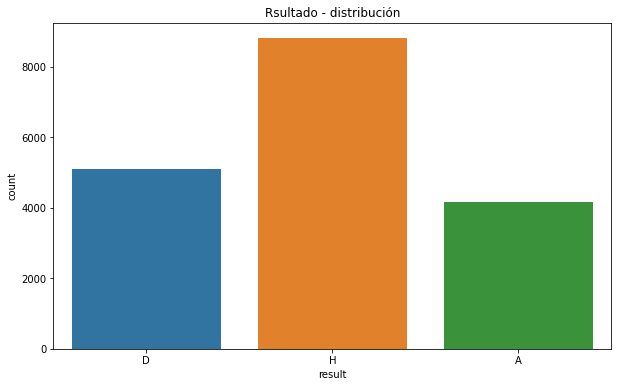

In [13]:
plt.figure(figsize = (10,6))
rc= sns.countplot(df['result'])
rc.set_title('Rsultado - distribución');

Se observa que los valores de esta variable no se encuentran balanceados - claramente los triunfos locales (H) resultan muy mayores que el resto

In [14]:
frec = df["result"].value_counts() #conteo por cada valor, será la frecuencia
frec

H    8812
D    5099
A    4168
Name: result, dtype: int64

In [15]:
frec_df = pd.DataFrame(frec) #creamos un dataframe con los datos de la frecuencia 
frec_df

,result
H,8812
D,5099
A,4168


In [16]:
frec_df.rename(columns={'result':'Frec_abs'},inplace=True) #reemplazamos el nombre de la columna para la frencuencia abosluta
frec_df

,Frec_abs
H,8812
D,5099
A,4168


In [17]:
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum
H,8812,8812
D,5099,13911
A,4168,18079


In [18]:
#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = round(100 * frec_df["Frec_abs"]/len(df.result),4)
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%
H,8812,8812,48.7416
D,5099,13911,28.2040
A,4168,18079,23.0544


In [19]:
#Obtenemos las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista sin datos en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

# variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
H,8812,8812,48.7416,48.7416
D,5099,13911,28.2040,76.9456
A,4168,18079,23.0544,100.0000


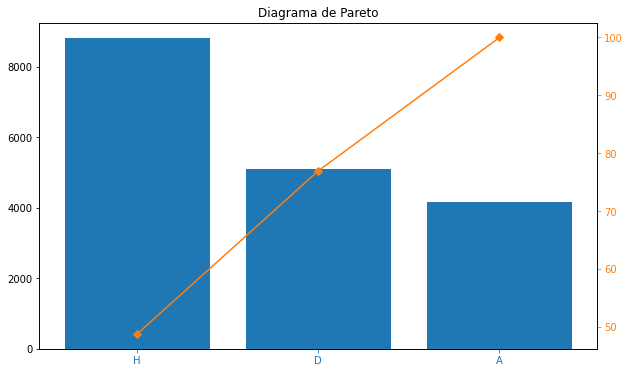

In [20]:

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1,1,1)

ax.set_title ('Diagrama de Pareto')

ax.bar(frec_df.index, frec_df['Frec_abs'], color ="C0")

ax2 = ax.twinx()
ax2.plot(frec_df.index, frec_df['frec_rel_%_acum'], color = "C1", marker = "D", ms = 5)

ax.tick_params(axis="x", colors="C0")
ax2.tick_params(axis="y", colors= "C1")


plt.show()

El 76 de los partidos se pueden explicar en un triunfo de los locales o un empate -

# **TOTGOAL**


---

Esta variable nos dirá la totalidad de goles en un partido.

In [21]:
df.totgoal.describe()

count    18079.000000
mean         2.485978
std          1.725046
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: totgoal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


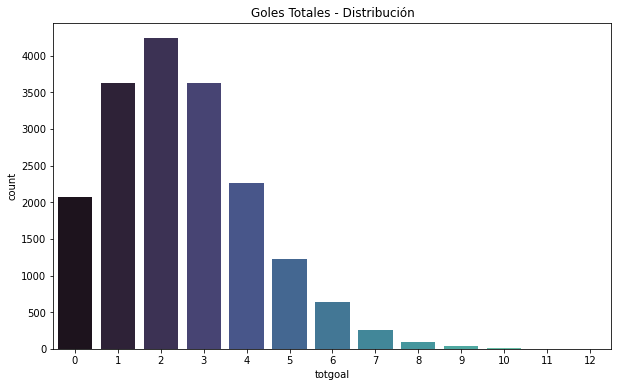

In [22]:
plt.figure(figsize = (10,6))
cp = sns.countplot(df['totgoal'], palette= "mako")
cp.set_title('Goles Totales - Distribución');

Una distribución con sesgo a la derecha, la mayoría se encuentra acumulada en los valores bajos. Siendo la Cantidad de 2 goles la moda, el promedio  2.485978 - 

In [23]:
import statistics
print(statistics.median(df['totgoal'])) #mediana

2


La mediana es 2 por lo que del 0 a 2 se agrupan el 50% de los valores

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


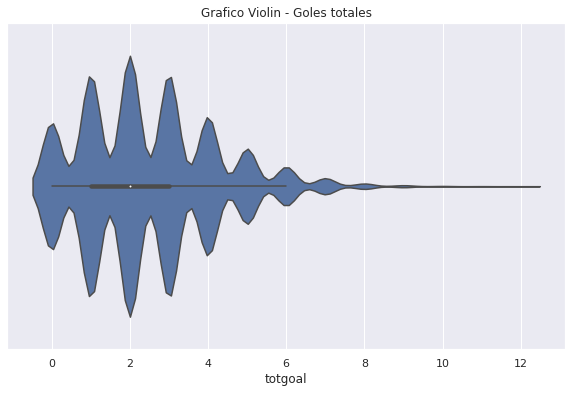

In [24]:
sns.set(rc = {'figure.figsize':(10,6)})
viototgol= sns.violinplot(df.totgoal, orient = "v", inner="box", size= 7)
viototgol.set_title('Grafico Violin - Goles totales');
#sns.stripplot(df.totgoal, color = 'red', size= 5, linewidth=0.15);

Puede observarse mayor agrupacion entre cero y dos disminuyendo hasta 4 donde pasa a disminuirse drasticamente siendo a partir de 8 valores excepcionales.

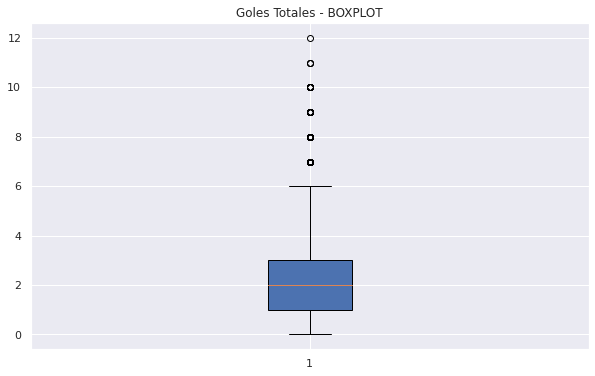

In [25]:
plt.figure(figsize = (10,6))
plt.boxplot(df.totgoal, patch_artist = True,vert=True, meanline= True);
plt.title("Goles Totales - BOXPLOT");

Se aprecia, aun mas claro, lo manifestado anteriormente respecto de los la distribuciones de goles antes y despues de 2 y lo excepcional de los goles - ya mayores a 6.

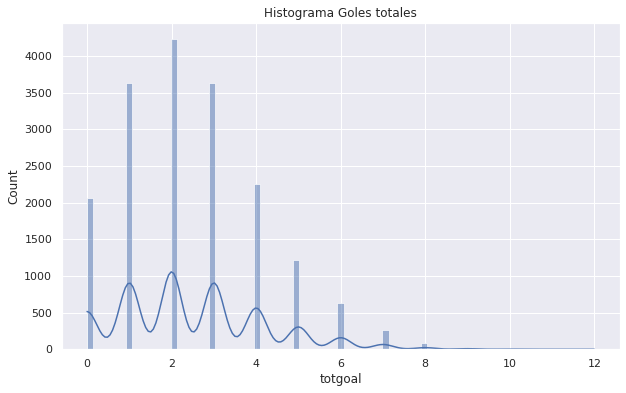

In [26]:
histtotgoal = sns.histplot(data=df, x="totgoal", kde=True)
histtotgoal.set_title('Histograma Goles totales');

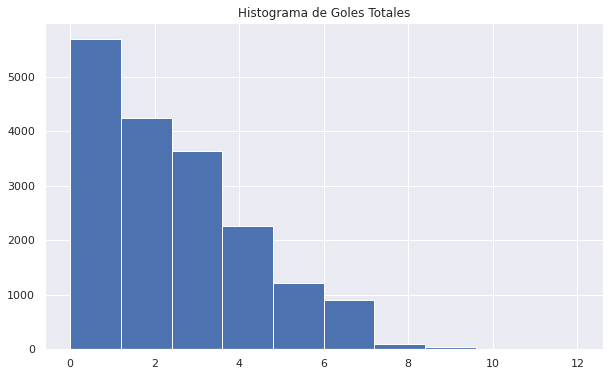

In [27]:
plt.figure(figsize = (10,6))
plt.hist(df['totgoal']) #histograma de goels totales por partido
plt.title("Histograma de Goles Totales");

In [28]:
frectotgoal = df["totgoal"].value_counts() #frecuencias por cantidad de gol por partido
frectotgoal

2     4238
3     3631
1     3628
4     2260
0     2067
5     1223
6      633
7      263
8       89
9       34
10       9
11       3
12       1
Name: totgoal, dtype: int64

In [29]:
df_frectotgoal = pd.DataFrame(frectotgoal) #dataframe de la frecuencia por goles
df_frectotgoal

,totgoal
2,4238
3,3631
1,3628
4,2260
0,2067
5,1223
6,633
7,263
8,89
9,34


In [30]:
df_frectotgoal.rename(columns={'totgoal': 'Frec_absoluta'}, inplace=True) #cambiamos nombre columna a frecuecia absoluta
df_frectotgoal

,Frec_absoluta
2,4238
3,3631
1,3628
4,2260
0,2067
5,1223
6,633
7,263
8,89
9,34


In [31]:
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = df_frectotgoal["Frec_absoluta"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
df_frectotgoal["frec_abs_acum"] = acum
df_frectotgoal

,Frec_absoluta,frec_abs_acum
2,4238,4238
3,3631,7869
1,3628,11497
4,2260,13757
0,2067,15824
5,1223,17047
6,633,17680
7,263,17943
8,89,18032
9,34,18066


In [32]:
#Calculamos la Frecuencia Relativa en %
df_frectotgoal["frec_rel_%"] = round(100 * df_frectotgoal["Frec_absoluta"]/len(df.totgoal),4)
df_frectotgoal

,Frec_absoluta,frec_abs_acum,frec_rel_%
2,4238,4238,23.4416
3,3631,7869,20.0841
1,3628,11497,20.0675
4,2260,13757,12.5007
0,2067,15824,11.4332
5,1223,17047,6.7648
6,633,17680,3.5013
7,263,17943,1.4547
8,89,18032,0.4923
9,34,18066,0.1881


In [33]:
#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = df_frectotgoal["frec_rel_%"] .values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
df_frectotgoal["frec_rel_%_acum"] = acum
df_frectotgoal

,Frec_absoluta,frec_abs_acum,frec_rel_%,frec_rel_%_acum
2,4238,4238,23.4416,23.4416
3,3631,7869,20.0841,43.5257
1,3628,11497,20.0675,63.5932
4,2260,13757,12.5007,76.0939
0,2067,15824,11.4332,87.5271
5,1223,17047,6.7648,94.2919
6,633,17680,3.5013,97.7932
7,263,17943,1.4547,99.2479
8,89,18032,0.4923,99.7402
9,34,18066,0.1881,99.9283


EL 63% DE LOS PARTIDOS TIENE  UNO Y TRES GOLES EN TOTAL. lOS PARTIDOS CON 2 GOLES SON LOS QUE MAS SE REPITEN CON UN 23.4% - DATO DE COLOR EN TODOS ESTOS AÑOS HUBO UN PARTIDO CON 12 GOLES

In [34]:
df_frectotgoal.index.astype(str)

Index(['2', '3', '1', '4', '0', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

In [35]:
df_frectotgoal = df_frectotgoal.sort_values(by='Frec_absoluta',ascending=False)
df_frectotgoal

,Frec_absoluta,frec_abs_acum,frec_rel_%,frec_rel_%_acum
2,4238,4238,23.4416,23.4416
3,3631,7869,20.0841,43.5257
1,3628,11497,20.0675,63.5932
4,2260,13757,12.5007,76.0939
0,2067,15824,11.4332,87.5271
5,1223,17047,6.7648,94.2919
6,633,17680,3.5013,97.7932
7,263,17943,1.4547,99.2479
8,89,18032,0.4923,99.7402
9,34,18066,0.1881,99.9283


<Figure size 720x432 with 0 Axes>

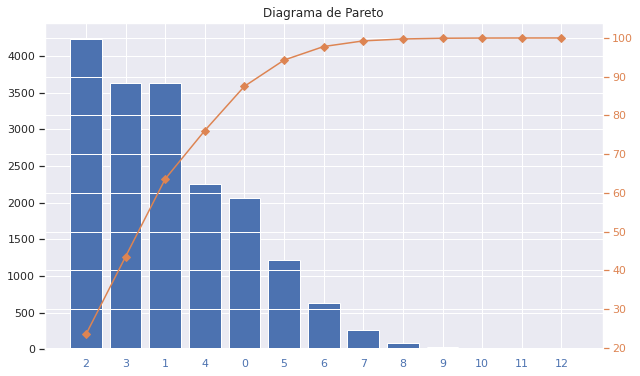

In [36]:
plt.figure(figsize = (10,6))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_title ('Diagrama de Pareto')

ax.bar((df_frectotgoal.index.astype(str)), df_frectotgoal['Frec_absoluta'], color ="C0")

ax2 = ax.twinx()
ax2.plot((df_frectotgoal.index.astype(str)), df_frectotgoal['frec_rel_%_acum'], color = "C1", marker = "D", ms = 5)
#pasamos el index a string para que quede ordenado como debe ser sino lo tomaba en el orden numerico ascendiente
ax.tick_params(axis="x", colors="C0")
ax2.tick_params(axis="y", colors= "C1")


plt.show()


La cantidad de goles por partido de 2, 3, 1 y 4 representan casi el 80% de los 
casos.

# **goaldiff**


---

Diferencia de goles, con relación al local. Será positiva si es a favor del equipo local, será negativa si es a favor del equpo visitante. Será igual a cero en caso de empate.

In [37]:
df.goaldiff.describe()

count    18079.000000
mean         0.506333
std          1.670551
min         -8.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: goaldiff, dtype: float64

In [38]:
print(statistics.median(df['goaldiff'])) #mediana

0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


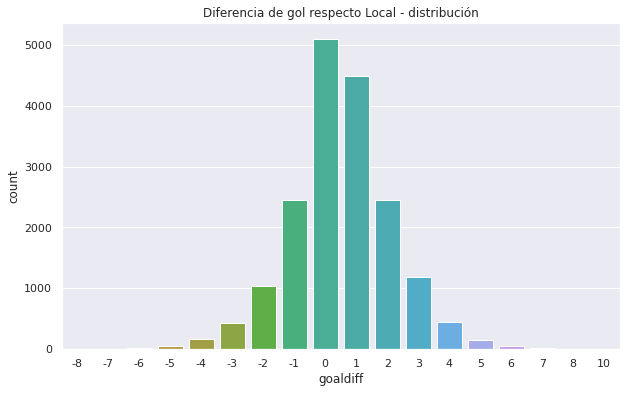

In [39]:
dc= sns.countplot(df['goaldiff'])
dc.set_title('Diferencia de gol respecto Local - distribución'); #buena distribución

distribucion normalizada - existen valores negativos ( es la diferencia de gol repecto del local)

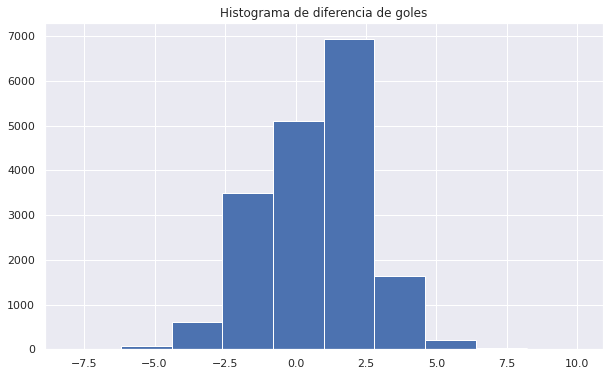

In [40]:
plt.figure(figsize = (10,6))
plt.hist(df['goaldiff']) # bins el numero de divisiones del histograma
plt.title("Histograma de diferencia de goles");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


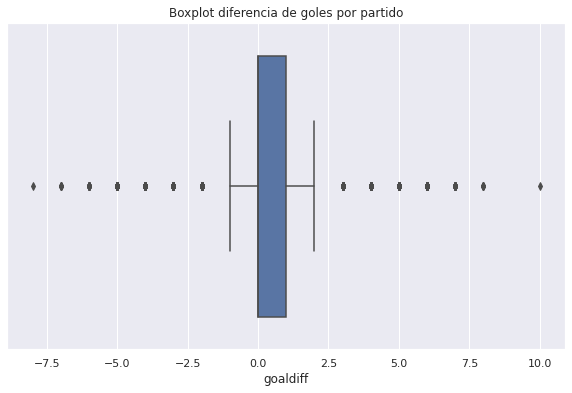

In [41]:
sns.set(rc = {'figure.figsize':(10,6)})
difbox= sns.boxplot(df.goaldiff, orient="v") #se observan outliers
difbox.set_title('Boxplot diferencia de goles por partido');

gran concentración entre 0 y 2.5 y -2.5 
se observa caso excepcional de diez goles de diferencia de gol en un partido.

tabla de frecuencia de Diferencia de Gol

In [42]:
frecgoaldif = df["goaldiff"].value_counts() #frecuencias diferencia de gol por partido
frecgoaldif

 0     5099
 1     4484
 2     2458
-1     2451
 3     1180
-2     1039
 4      454
-3      439
-4      161
 5      145
 6       61
-5       54
 7       23
-6       17
 8        6
-7        6
 10       1
-8        1
Name: goaldiff, dtype: int64

In [43]:
df_frecgoaldif = pd.DataFrame(frecgoaldif) #dataframe de la frecuencia por goles
df_frecgoaldif

,goaldiff
0,5099
1,4484
2,2458
-1,2451
3,1180
-2,1039
4,454
-3,439
-4,161
5,145


In [44]:
df_frecgoaldif.rename(columns={'goaldiff': 'Frec_absoluta'}, inplace=True) #cambiamos nombre columna a frecuecia absoluta
df_frecgoaldif

,Frec_absoluta
0,5099
1,4484
2,2458
-1,2451
3,1180
-2,1039
4,454
-3,439
-4,161
5,145


In [45]:
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = df_frecgoaldif["Frec_absoluta"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
df_frecgoaldif["frec_abs_acum"] = acum
df_frecgoaldif

,Frec_absoluta,frec_abs_acum
0,5099,5099
1,4484,9583
2,2458,12041
-1,2451,14492
3,1180,15672
-2,1039,16711
4,454,17165
-3,439,17604
-4,161,17765
5,145,17910


In [46]:
#Calculamos la Frecuencia Relativa en %
df_frecgoaldif["frec_rel_%"] = round(100 * df_frecgoaldif["Frec_absoluta"]/len(df.goaldiff),4)
df_frecgoaldif

,Frec_absoluta,frec_abs_acum,frec_rel_%
0,5099,5099,28.2040
1,4484,9583,24.8023
2,2458,12041,13.5959
-1,2451,14492,13.5572
3,1180,15672,6.5269
-2,1039,16711,5.7470
4,454,17165,2.5112
-3,439,17604,2.4282
-4,161,17765,0.8905
5,145,17910,0.8020


In [47]:
#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = df_frecgoaldif["frec_rel_%"] .values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
df_frecgoaldif["frec_rel_%_acum"] = acum
df_frecgoaldif

,Frec_absoluta,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0,5099,5099,28.2040,28.2040
1,4484,9583,24.8023,53.0063
2,2458,12041,13.5959,66.6022
-1,2451,14492,13.5572,80.1594
3,1180,15672,6.5269,86.6863
-2,1039,16711,5.7470,92.4333
4,454,17165,2.5112,94.9445
-3,439,17604,2.4282,97.3727
-4,161,17765,0.8905,98.2632
5,145,17910,0.8020,99.0652



*   **Entre los valores -1, 0, 1 y 2 se encuentran el 80% de las diferencias de gol por partido.-**



In [48]:
listaindex = list(df_frecgoaldif.index)
listaindex

[0, 1, 2, -1, 3, -2, 4, -3, -4, 5, 6, -5, 7, -6, 8, -7, 10, -8]

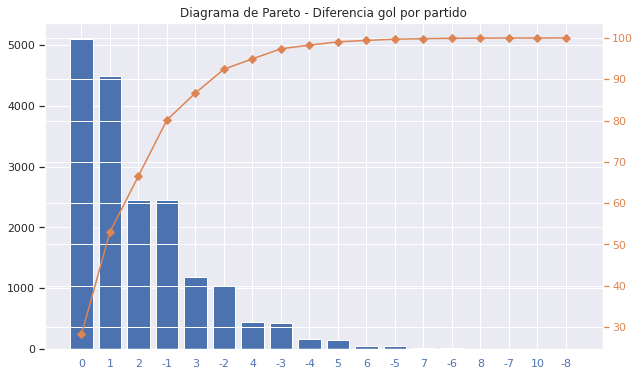

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_title ('Diagrama de Pareto - Diferencia gol por partido')

ax.bar((df_frecgoaldif.index.astype(str)), df_frecgoaldif['Frec_absoluta'], color ="C0")

ax2 = ax.twinx()
ax2.plot((df_frecgoaldif.index.astype(str)), df_frecgoaldif['frec_rel_%_acum'], color = "C1", marker = "D", ms = 5)


ax.tick_params(axis="x", colors="C0")
ax2.tick_params(axis="y", colors= "C1")


plt.show()

los resultados de 0, 1, 2 y -1 de diferencia del gol del del local reflejan el 80% de los resultados.

# **Variables HOME Y VISITOR**


---

Nombre de los equipos que participan de los partidos en su calidad de local o de visitante.

In [50]:
equiposh=df["home"].value_counts(ascending=True)
equiposv=df["visitor"].value_counts(ascending=True)
print("Equipos de casa:")
print(" ")
print(equiposh)
print(" ")
print(" ")
print("Equipos visitantes")
print(" ")
print(equiposv)

Equipos de casa:
 
Hatayspor               9
MKE Kirikkalespor      15
Petrol Ofisi           17
Bucaspor               17
Siirtspor              17
                     ... 
Bursaspor             822
MKE Ankaragucu        838
Besiktas             1033
Galatasaray          1034
Fenerbahce           1034
Name: home, Length: 73, dtype: int64
 
 
Equipos visitantes
 
Hatayspor               8
MKE Kirikkalespor      15
Bucaspor               17
Siirtspor              17
Petrol Ofisi           17
                     ... 
Bursaspor             822
MKE Ankaragucu        839
Besiktas             1026
Galatasaray          1027
Fenerbahce           1027
Name: visitor, Length: 73, dtype: int64


Se obtiene el numero total de equipos.

teamsh=equpio local

teamsv=equipo visitante

In [51]:
teamsh=df["home"].unique()
teamsv=df["visitor"].unique()
print(len(teamsh))
print(len(teamsv))

73
73


¿cuáles son los puntajes (goles) más altos obtenidos por los equipos cuando jugaron como locales o visitantes?

In [52]:
df['hgoal'].nlargest(n=15)

8700     10
2905      9
6761      9
190       8
1260      8
6279      8
9240      8
9432      8
9543      8
9895      8
9984      8
10042     8
10287     8
10667     8
1372      7
Name: hgoal, dtype: int64

In [53]:
df['vgoal'].nlargest(n=15)

9677     8
10152    8
10628    8
12066    8
570      7
3652     7
8194     7
8561     7
10205    7
10215    7
10954    7
12007    7
12473    7
12507    7
13206    7
Name: vgoal, dtype: int64

Se filtra el data frame para saber cuales son los equipos con más goles.

In [54]:
df[['Date', 'Season', 'Week','home','visitor', 'hgoal', 'vgoal']].nlargest(15,["hgoal"])#equipo local

,Date,Season,Week,home,visitor,hgoal,vgoal
8700,1989-10-15,1989,6,Besiktas,Adana Demirspor,10,0
2905,1968-05-04,1967,31,Goztepe,Ferikoy,9,1
6761,1983-12-10,1983,15,Galatasaray,Adana Demirspor,9,2
190,1959-10-24,1959,9,Galatasaray,Altinordu,8,0
1260,1962-09-09,1962,1,Genclerbirligi,Turanspor,8,1
6279,1982-05-02,1981,28,Altay,Diyarbakirspor,8,1
9240,1991-10-06,1991,6,Konyaspor,Adana Demirspor,8,0
9432,1992-05-16,1991,30,Fenerbahce,Gaziantepspor,8,4
9543,1992-12-06,1992,14,MKE Ankaragucu,Konyaspor,8,0
9895,1994-05-01,1993,28,Fenerbahce,Samsunspor,8,1


In [55]:
df[['Date', 'Season', 'Week','home','visitor', 'hgoal', 'vgoal']].nlargest(15,["vgoal"])#equipo visitante

,Date,Season,Week,home,visitor,hgoal,vgoal
9677,1993-05-30,1992,30,MKE Ankaragucu,Galatasaray,0,8
10152,1995-03-24,1994,27,Altay,Besiktas,2,8
10628,1996-10-27,1996,11,Altay,Galatasaray,1,8
12066,2001-08-12,2001,1,Antalyaspor,MKE Ankaragucu,1,8
570,1960-10-15,1960,8,Karsiyaka,Fenerbahce,1,7
3652,1971-06-06,1970,30,Turk Telekom,Galatasaray,1,7
8194,1988-03-13,1987,27,Malatyaspor,Adana Demirspor,2,7
8561,1989-03-25,1988,29,Eskisehirspor,Fenerbahce,2,7
10205,1995-05-07,1994,32,Adana Demirspor,Genclerbirligi,0,7
10215,1995-05-21,1994,34,Zeytinburnuspor,Galatasaray,3,7


Marcador más frecuente, es decir, ¿Cuál es la cantidad de goles que más se repite?

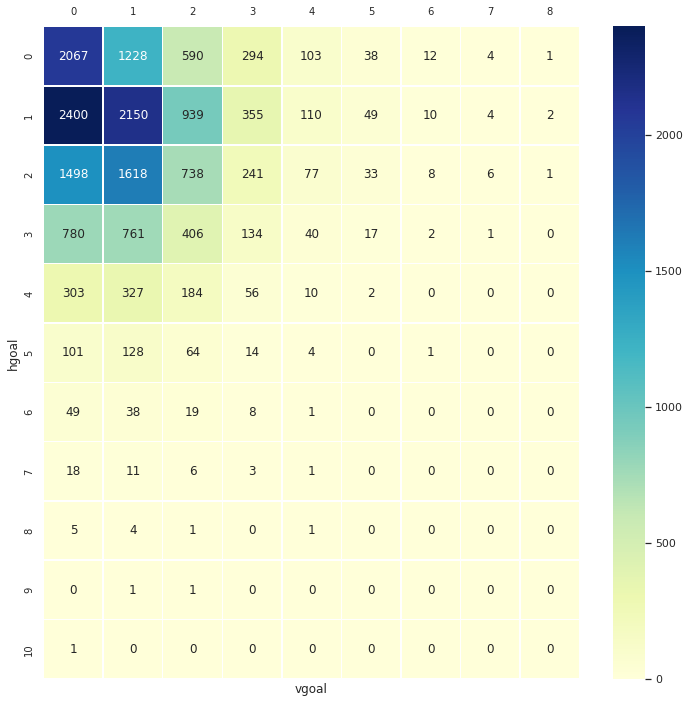

In [56]:
fig, ax = plt.subplots(figsize=(12,12))
selecc =pd.crosstab(df.hgoal,[df.vgoal])
plt.tick_params(axis="both",which="major",labelsize=10,labelbottom=False, bottom=False, top=False, labeltop=True)
ax = sns.heatmap(selecc,annot=True, linewidths=0.5, fmt ="d", cmap="YlGnBu")


Marcadores por año, como ejemplo ilustrativo se dividieron en dos fechas secciones:

# **Variable date**


---

Fecha del partido.

In [57]:
#df["Date"]=pd.to_datetime(df["Date"])
print("Fecha más antigua:")
print(df["Date"].min())
print("")
print("")
print("Fecha más reciente")
print(df["Date"].max())

Fecha más antigua:
01/11/2020


Fecha más reciente
31/10/2020


# **Variable FT**


---
Resultado del partido expresado con goles de local-goles de visitante.


In [58]:
df['FT'].unique() #Valores únicos de la variable

array(['1-1', '2-1', '0-2', '3-1', '1-2', '2-2', '0-0', '2-0', '1-0',
       '0-1', '0-3', '3-2', '1-3', '0-5', '3-0', '2-3', '1-4', '4-2',
       '4-0', '5-1', '0-4', '6-0', '4-1', '8-0', '6-1', '5-0', '5-3',
       '3-3', '1-5', '4-3', '6-3', '2-4', '1-7', '0-6', '2-6', '6-2',
       '5-2', '8-1', '2-5', '7-2', '1-6', '7-0', '3-4', '9-1', '4-4',
       '7-1', '3-5', '9-2', '5-4', '7-3', '7-4', '2-7', '10-0', '8-4',
       '3-6', '0-8', '8-2', '2-8', '0-7', '3-7', '1-8', '4-5', '5-6',
       '6-4'], dtype=object)

In [59]:
df.FT.describe() # describe 

count     18079
unique       64
top         1-0
freq       2400
Name: FT, dtype: object

hay 64 convinaciones de resultados - el resultado top es 1-0 (local uno visitante cero), que se repite 2400

In [60]:
frecFT = df["FT"].value_counts() #conteo por cada valor, será la frecuencia
frecFT.head(10)

1-0    2400
1-1    2150
0-0    2067
2-1    1618
2-0    1498
0-1    1228
1-2     939
3-0     780
3-1     761
2-2     738
Name: FT, dtype: int64

lista de los diez resultados que más se repiten. El resultado que más se da es el 1-0 (gana el local), seguido por dos empates (1-1 y 0-0). 

In [61]:
#Guardamos esta información en un dataframe
frecFT = pd.DataFrame(frecFT)
frecFT

,FT
1-0,2400
1-1,2150
0-0,2067
2-1,1618
2-0,1498
...,...
8-2,1
2-8,1
3-7,1
5-6,1


In [62]:
#Asignamos el nombre Frec_abs a la columna
frecFT.rename(columns={'FT':'Frec_abs'},inplace=True)
frecFT

,Frec_abs
1-0,2400
1-1,2150
0-0,2067
2-1,1618
2-0,1498
...,...
8-2,1
2-8,1
3-7,1
5-6,1


In [63]:
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frecFT["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frecFT["frec_abs_acum"] = acum
frecFT

,Frec_abs,frec_abs_acum
1-0,2400,2400
1-1,2150,4550
0-0,2067,6617
2-1,1618,8235
2-0,1498,9733
...,...,...
8-2,1,18075
2-8,1,18076
3-7,1,18077
5-6,1,18078


In [64]:
#Calculamos la Frecuencia Relativa en %
frecFT["frec_rel_%"] = 100 * frecFT["Frec_abs"]/len(df.FT)
frecFT

,Frec_abs,frec_abs_acum,frec_rel_%
1-0,2400,2400,13.275071
1-1,2150,4550,11.892251
0-0,2067,6617,11.433154
2-1,1618,8235,8.949610
2-0,1498,9733,8.285857
...,...,...,...
8-2,1,18075,0.005531
2-8,1,18076,0.005531
3-7,1,18077,0.005531
5-6,1,18078,0.005531


In [65]:
#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frecFT["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frecFT["frec_rel_%_acum"] = acum
frecFT

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
1-0,2400,2400,13.275071,13.275071
1-1,2150,4550,11.892251,25.167321
0-0,2067,6617,11.433154,36.600476
2-1,1618,8235,8.949610,45.550086
2-0,1498,9733,8.285857,53.835942
...,...,...,...,...
8-2,1,18075,0.005531,99.977875
2-8,1,18076,0.005531,99.983406
3-7,1,18077,0.005531,99.988937
5-6,1,18078,0.005531,99.994469


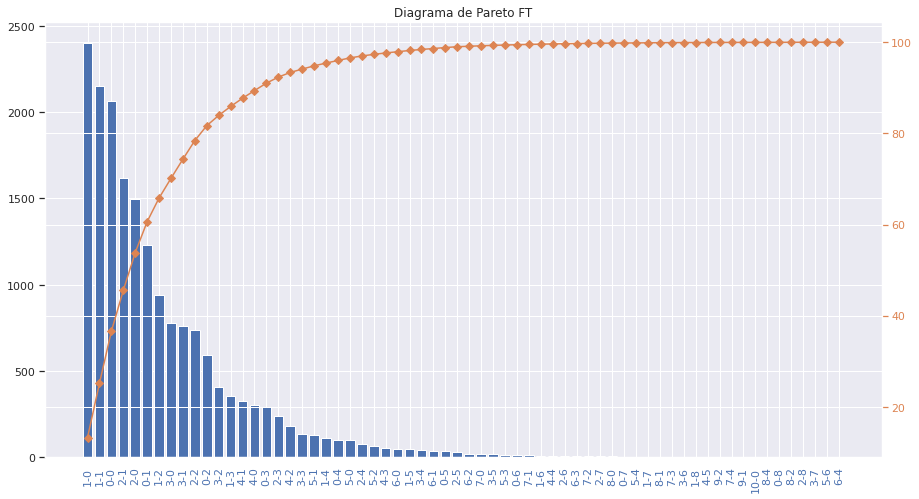

In [66]:
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(1,1,1)

ax.set_title ('Diagrama de Pareto FT')

ax.bar(frecFT.index, frecFT['Frec_abs'], color ="C0")

ax2 = ax.twinx()
ax2.plot(frecFT.index, frecFT['frec_rel_%_acum'], color = "C1", marker = "D", ms = 5)

ax.tick_params(axis="x", colors="C0")
ax2.tick_params(axis="y", colors= "C1")

#rotamos las etiquetas del eje x para que se puedan leer mejor
ax.set_xticklabels(frecFT.index, rotation= 90)

plt.show()

El 80% de los resultados del dataset se puede observar en en solo 10 tipo de marcadores. Casí el 40% se explica solo en tres resultados (1-0,1-1 y 0-0)

# **ANÁLISIS BIVARIADO.-**

In [67]:
matrix_correlation = df.corr() #corr pearson por default
print("Matriz de correlacion de variables numéricas")
matrix_correlation

Matriz de correlacion de variables numéricas


,Season,Week,hgoal,vgoal,tier,totgoal,goaldiff,hgoal_half,vgoal_half,half_totgoal,half_goaldiff,fans,neutral,home_red_card,visitor_red_card
Season,1.000000,0.020975,0.078615,0.152739,NaN,0.155868,-0.038447,0.041565,0.080214,0.081938,-0.019351,-0.222786,-0.031886,0.125156,0.118899
Week,0.020975,1.000000,0.017369,0.026635,NaN,0.029942,-0.003853,0.015284,0.020724,0.024622,-0.001443,0.011738,0.009539,-0.001532,-0.011422
hgoal,0.078615,0.017369,1.000000,0.032593,NaN,0.775139,0.757874,0.688083,0.027350,0.539885,0.520711,-0.007463,-0.027658,-0.047927,0.108298
vgoal,0.152739,0.026635,0.032593,1.000000,NaN,0.656719,-0.627353,0.043097,0.691210,0.466718,-0.413279,-0.026866,0.028628,0.120382,-0.034522
tier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
totgoal,0.155868,0.029942,0.775139,0.656719,NaN,1.000000,0.175277,0.546426,0.457569,0.702388,0.131650,-0.022614,-0.002772,0.039934,0.059893
goaldiff,-0.038447,-0.003853,0.757874,-0.627353,NaN,0.175277,1.000000,0.507988,-0.429876,0.116002,0.675478,0.011722,-0.040237,-0.115921,0.106914
hgoal_half,0.041565,0.015284,0.688083,0.043097,NaN,0.546426,0.507988,1.000000,0.030094,0.778561,0.762999,-0.009381,-0.021317,-0.031011,0.052420
vgoal_half,0.080214,0.020724,0.027350,0.691210,NaN,0.457569,-0.429876,0.030094,1.000000,0.650715,-0.623145,-0.017826,0.029644,0.066826,-0.016175
half_totgoal,0.081938,0.024622,0.539885,0.466718,NaN,0.702388,0.116002,0.778561,0.650715,1.000000,0.188381,-0.018318,0.002419,0.018399,0.029666


la variable TIER  no tiene relaacion con ninguna otra columna por lo cual la eliminaremos.
Nuestra varible target RESULT es una variable categorica

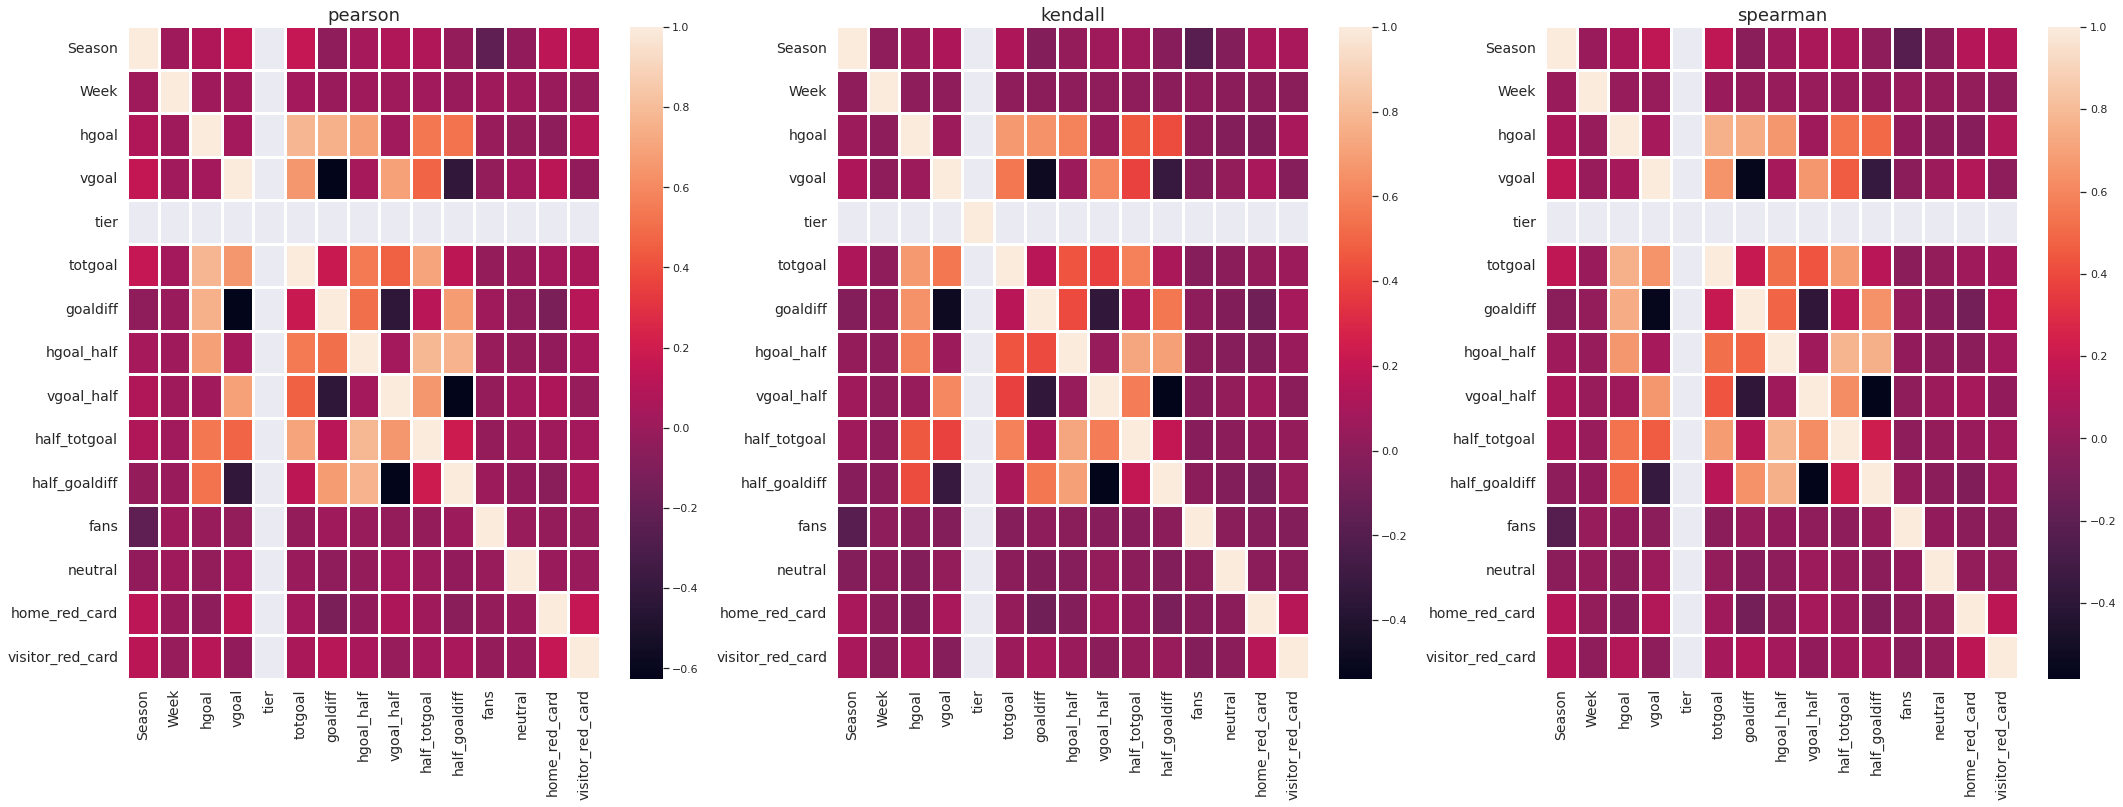

In [68]:
plt.figure(figsize=(36,12))
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = df.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)
  plt.yticks(fontsize=14)
  plt.xticks(fontsize=14)

In [69]:
def corrFilter(x: pd.DataFrame, thres: float):
    #generate corr 
    xCorr = x.corr('spearman')
    #filter corr by thres
    xFiltered = xCorr[((xCorr >= thres) | (xCorr <= -thres)) & (xCorr !=1.000)]
    #change dataframe format
    xFlattened = xFiltered.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()
    #rename columns
    xFlattened.columns = ['Variable_1', 'Variable_2', 'corr_value']
    return xFlattened

print('tabla de correlaciones mayores a 0.7')
corrFilter(df, .7)

tabla de correlaciones mayores a 0.7


,Variable_1,Variable_2,corr_value
3,hgoal_half,half_totgoal,0.774184
1,hgoal,totgoal,0.762967
4,hgoal_half,half_goaldiff,0.755570
2,hgoal,goaldiff,0.745795


la relacion de los goles del local con la totalidad de goles es evidentemente mayor que la de los goles del visitante.

Text(0.5, 1.02, 'Grafico variables númericas con mayor correlación')

<Figure size 1008x1008 with 0 Axes>

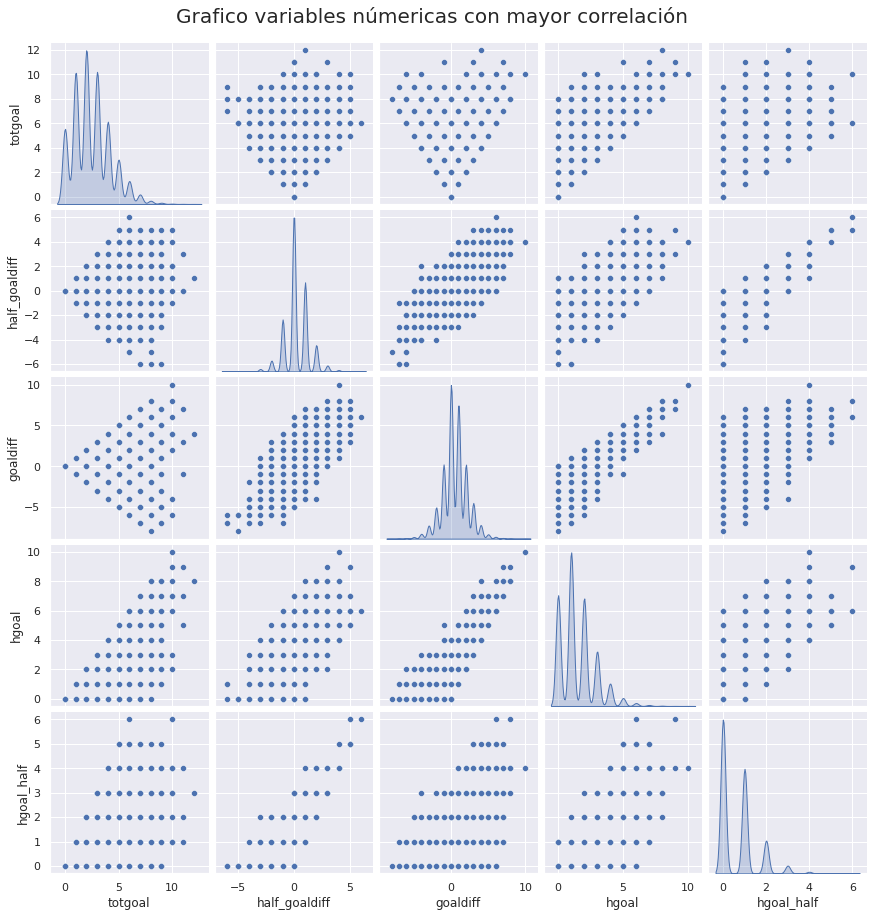

In [70]:
plt.figure(figsize=(14, 14))

g = sns.pairplot(df[['totgoal', 'half_goaldiff', 'goaldiff', 'hgoal', 'hgoal_half']], diag_kind='kde');
g.fig.suptitle("Grafico variables númericas con mayor correlación", fontsize=20, y=1.02)

Se observan correlaciones positivas no tan marcadas

**TOTGOAL - HGOAL**

---



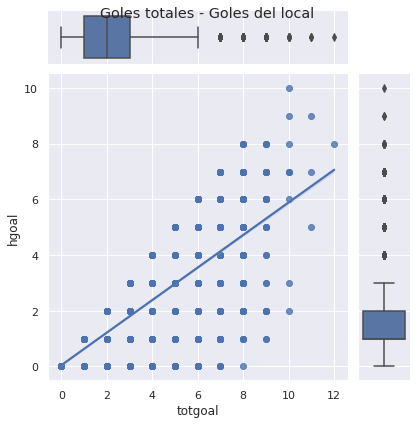

In [71]:
g = sns.JointGrid(data=df, x="totgoal", y="hgoal")
g.plot(sns.regplot, sns.boxplot)
g.fig.suptitle("Goles totales - Goles del local");

Se observa una correlacion positiva casos de más de diez goles en un partido (12) y de diez goles solo del local - así como también ocho goles del visitante sin goles del local

**TOTGOAL - HALF_TOTGOAL**

> GOLES TOTALES Y GOLES TOTALES AL MEDIO TIEMPO.







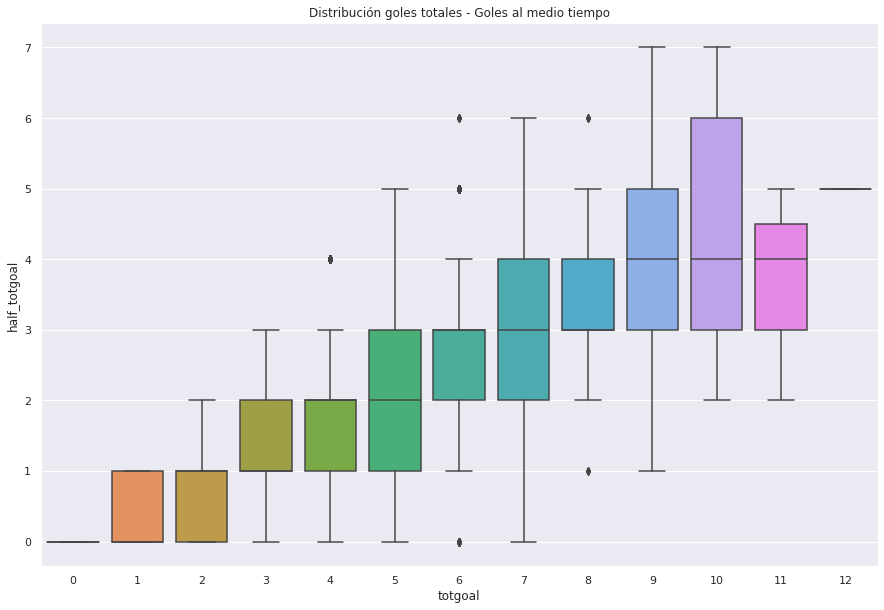

In [72]:
fig , ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='totgoal', y='half_totgoal', data=df)
plt.title('Distribución goles totales - Goles al medio tiempo');

Correlación positiva entre las dos cuanto más aumenta totgoal (goles totales), más aumenta (half_totgoal)

VARIABLES GOALDIFF Y HGOAL


> Diferencia de gol y goles del local



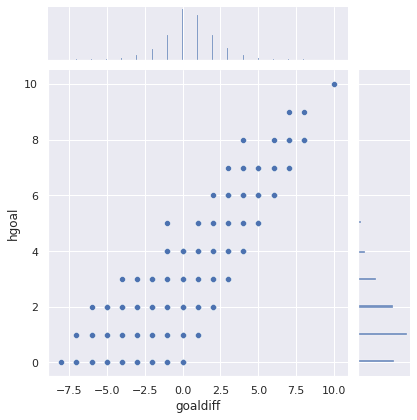

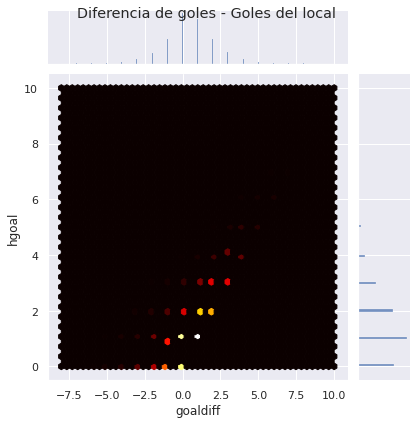

In [73]:
#grafico usando un scatterplot y histrograma 
gh = sns.jointplot(x = 'goaldiff', y= 'hgoal', data=df)
gh = sns.jointplot(x = 'goaldiff', y= 'hgoal', data=df, kind='hex', cmap='hot')
gh.fig.suptitle("Diferencia de goles - Goles del local");

**RESULT Y TOTGOAL -

>RESULTADO (H)HOME (D) DRAW (A) AWAY**



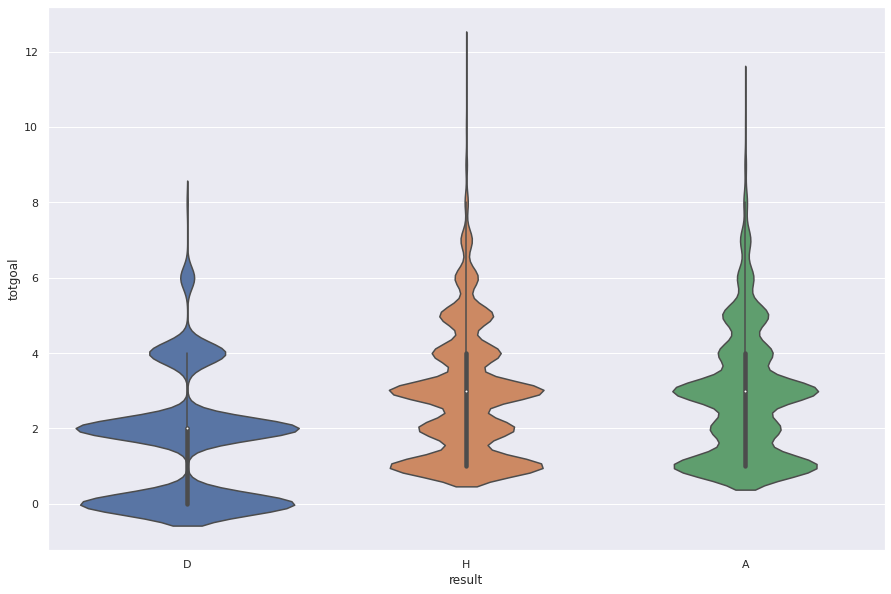

In [74]:
plt.figure(figsize=(15,10))
sns.violinplot(x = 'result', y='totgoal', data=df )

Se observa que los empates tienen menos goles 


Los triunfos del local tienen un poco mas de goles que los del triunfo visitante.

**RESULT - GOALDIFF**
Resultado y diferencia de gol

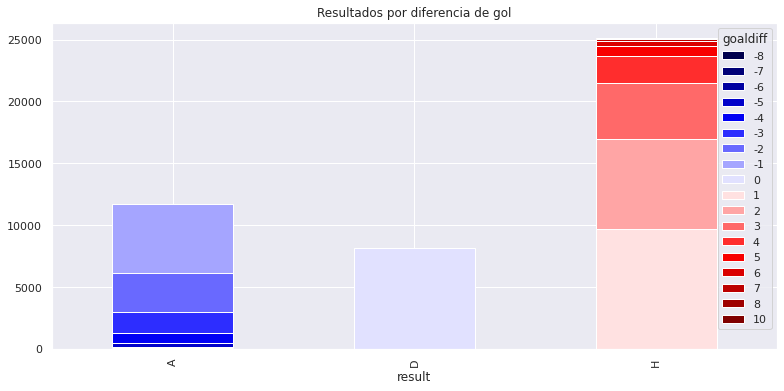

In [75]:
resultgoal = df.groupby(['result', 'goaldiff' ]).totgoal.sum()
resultgoal.unstack().plot(kind='bar',stacked=True, colormap= 'seismic', figsize=(13, 6))
plt.title('Resultados por diferencia de gol');

La diferencia de gol se calcula respecto del local - por lo cual los triunfos locales tienen dicha diferencia en positivo y los triunfos visitantes lo tienen en negativo - se vuelve a observar que existe una leve mayor cantidad de goles en los triunfos locales que en los triunfos de visitantes.

**# RESULT - HOME**

tabla calculando quienes ganan mas partidos de local

In [76]:
df['result'].value_counts()

H    8812
D    5099
A    4168
Name: result, dtype: int64

In [77]:
resulth = pd.DataFrame(pd.crosstab(index=df['home'], columns=df['result'], margins=False))
resulth= resulth.sort_values(by=['H'], ascending=False) #tabla de contingencia
print("Tabla de contingencia de partidos ganados de local, empates y partidos ganados de visitantes")
resulth.head(10)

Tabla de contingencia de partidos ganados de local, empates y partidos ganados de visitantes


result,A,D,H
home,,,
Fenerbahce,94,218,722
Galatasaray,113,216,705
Besiktas,121,248,664
Trabzonspor,120,165,491
Bursaspor,166,235,421
MKE Ankaragucu,235,243,360
Genclerbirligi,198,243,353
Altay,139,202,322
Eskisehirspor,91,145,253


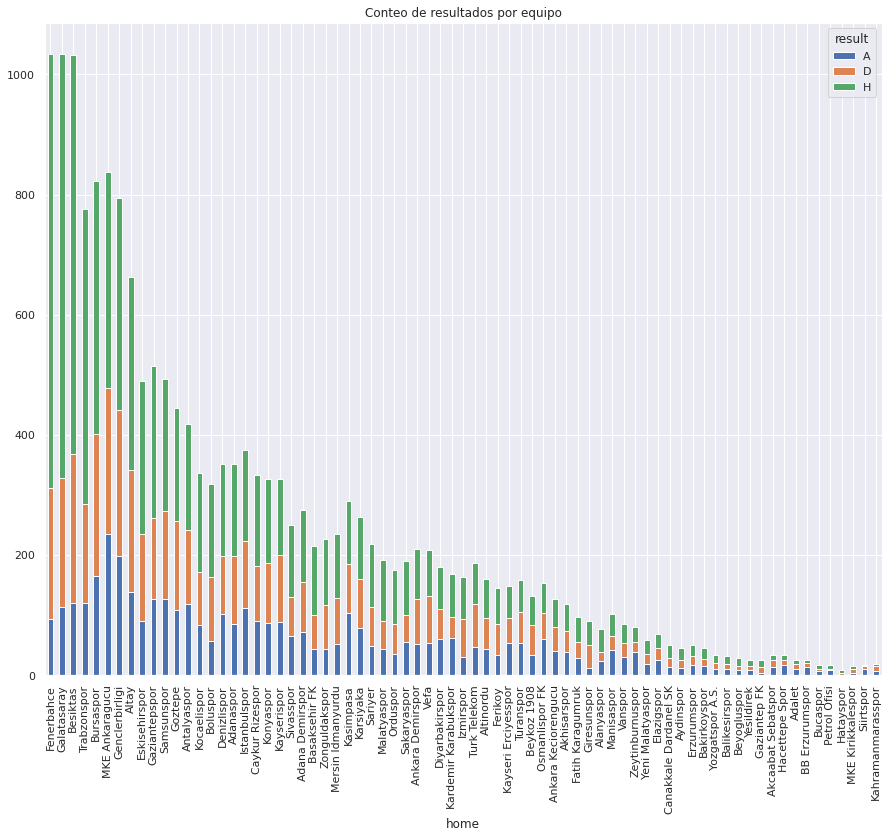

In [78]:
resulth.plot(kind="bar", stacked=True, rot=0, figsize=(15,12))
plt.xticks(rotation=90)
plt.title('Conteo de resultados por equipo');

En esta tabla en verde son los triunfos de local de cada equipo, en naranja los empates de local y en azul los partidos perdidos de local.

In [79]:
resulthtot = pd.DataFrame(pd.crosstab(index=df['home'], columns=df['result'], margins=True, normalize='index'))
resulthtot= resulthtot.sort_values(by=['H'], ascending=False) #tabla de contingencia
resulthtot

result,A,D,H
home,,,
Fenerbahce,0.090909,0.210832,0.698259
Galatasaray,0.109284,0.208897,0.681818
Besiktas,0.117135,0.240077,0.642788
Trabzonspor,0.154639,0.212629,0.632732
Hatayspor,0.111111,0.333333,0.555556
...,...,...,...
Akcaabat Sebatspor,0.411765,0.323529,0.264706
Hacettepe Spor,0.500000,0.235294,0.264706
BB Erzurumspor,0.500000,0.269231,0.230769


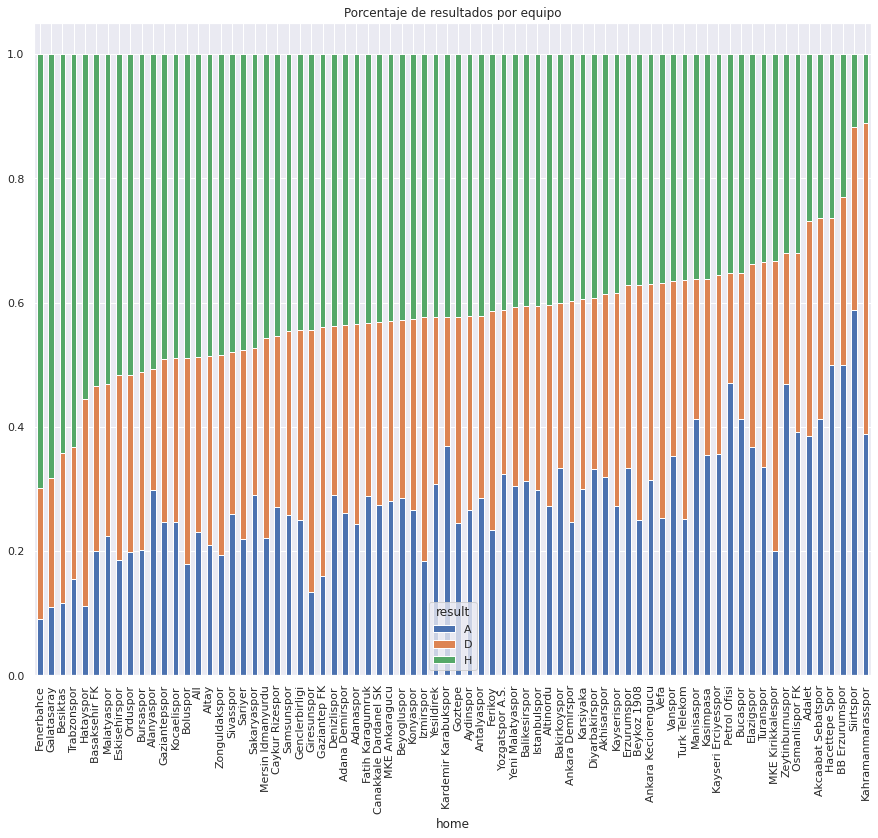

In [80]:
resulthtot.plot(kind="bar", stacked=True, rot=0, figsize=(15,12))
plt.xticks(rotation=90)
plt.title('Porcentaje de resultados por equipo');

**RESULT - VISITOR**

In [81]:
resultv = pd.DataFrame(pd.crosstab(index=df['visitor'], columns=df['result'], margins=False))
resultv= resultv.sort_values(by=['A'], ascending=False) #tabla de contingencia
resultv

result,A,D,H
visitor,,,
Galatasaray,458,308,261
Besiktas,453,312,261
Fenerbahce,449,324,254
Trabzonspor,279,259,237
Genclerbirligi,174,228,392
...,...,...,...
Balikesirspor,2,7,23
Yesildirek,2,9,21
Beyogluspor,1,9,16


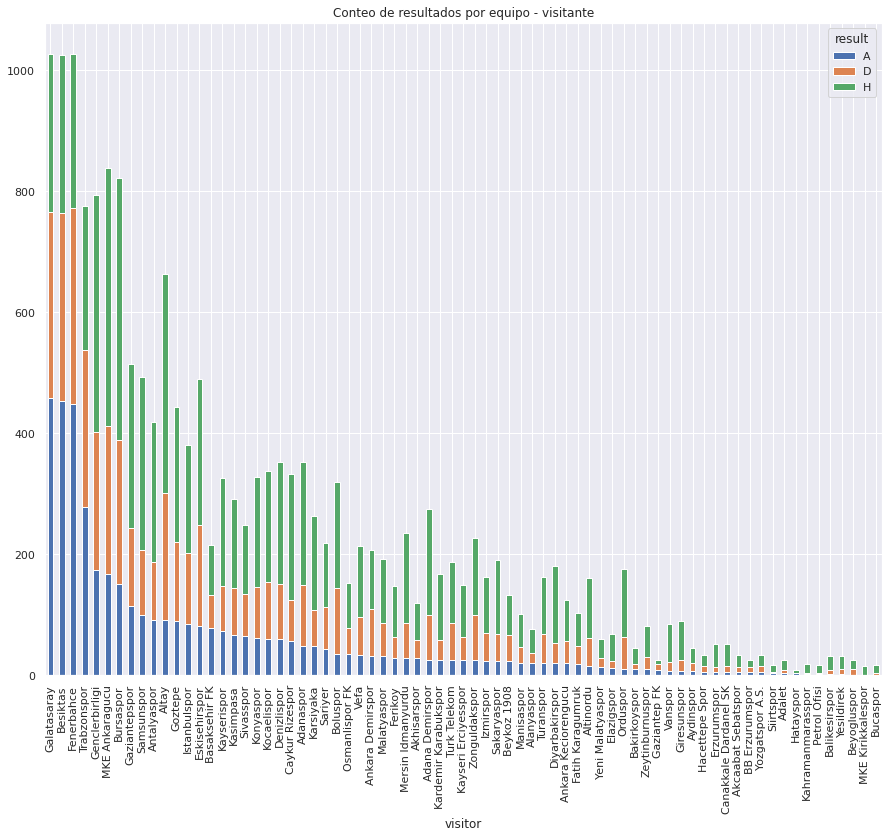

In [82]:
resultv.plot(kind="bar", stacked=True, rot=0, figsize=(15,12))
plt.xticks(rotation=90)
plt.title('Conteo de resultados por equipo - visitante');

In [83]:
resultvtot = pd.DataFrame(pd.crosstab(index=df['visitor'], columns=df['result'], margins=True, normalize='index'))
resultvtot= resultvtot.sort_values(by=['A'], ascending=False) #tabla de contingencia en porcentaje
resultvtot

result,A,D,H
visitor,,,
Galatasaray,0.445959,0.299903,0.254138
Besiktas,0.441520,0.304094,0.254386
Fenerbahce,0.437196,0.315482,0.247322
Hatayspor,0.375000,0.125000,0.500000
Basaksehir FK,0.365741,0.245370,0.388889
...,...,...,...
Balikesirspor,0.062500,0.218750,0.718750
Yesildirek,0.062500,0.281250,0.656250
Beyogluspor,0.038462,0.346154,0.615385


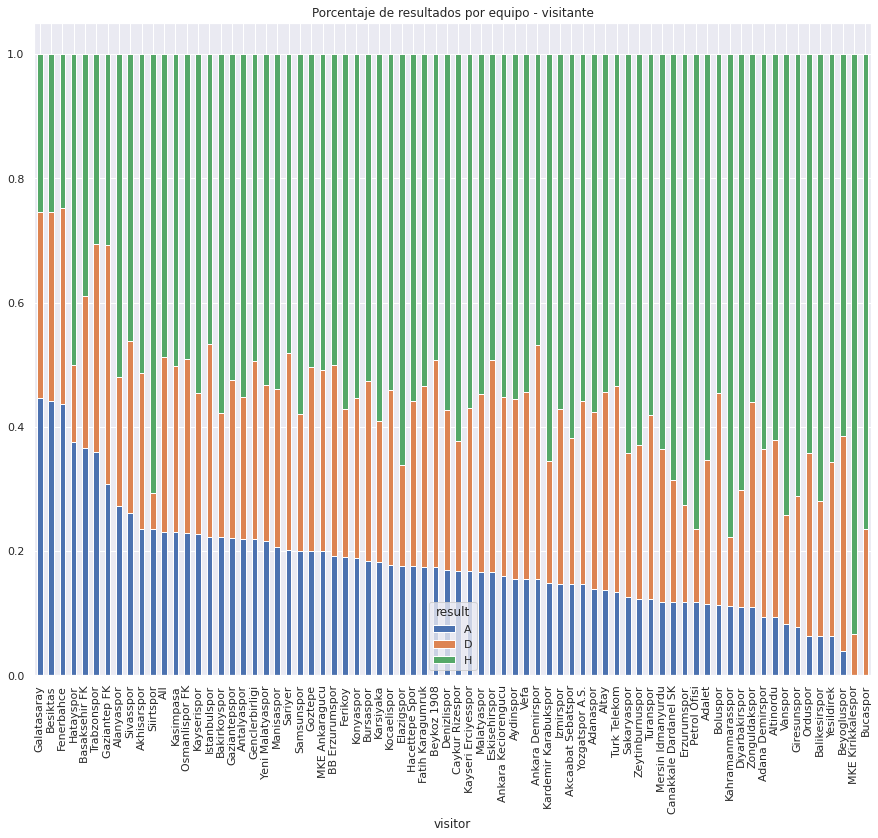

In [84]:
resultvtot.plot(kind="bar", stacked=True, rot=0, figsize=(15,12))
plt.xticks(rotation=90)
plt.title('Porcentaje de resultados por equipo - visitante');

Tabla ordenada por quien gana más de visitante - dicho resultado en azul - empate en naranja y en verde cuando gana el local.
Se observa de la comparacion de las dos tablas que los equipos ganan más de local que de visitante

CHI CUADRADO - TABLA CONTINGENCIA RESULTADOS HOME (DESDE EL LOCAL)

In [85]:
chi= pd.crosstab(index=df['home'], columns=df['result'], margins=True)
chi

result,A,D,H,All
home,,,,
Adalet,10,9,7,26
Adana Demirspor,72,83,120,275
Adanaspor,86,113,153,352
Akcaabat Sebatspor,14,11,9,34
Akhisarspor,38,35,46,119
...,...,...,...,...
Yesildirek,8,7,11,26
Yozgatspor A.S.,11,9,14,34
Zeytinburnuspor,38,17,26,81


In [86]:
data = chi
stat, p, dof, expected = chi2_contingency(data) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 1.3394947471121625e-108
Dependent(reject H0)


La varaibles HOME Y RESULT resultan dependientes



---



In [87]:
chi2= pd.crosstab(index=df['visitor'], columns=df['result'], margins=True)
chi2

result,A,D,H,All
visitor,,,,
Adalet,3,6,17,26
Adana Demirspor,26,74,175,275
Adanaspor,49,100,203,352
Akcaabat Sebatspor,5,8,21,34
Akhisarspor,28,30,61,119
...,...,...,...,...
Yesildirek,2,9,21,32
Yozgatspor A.S.,5,10,19,34
Zeytinburnuspor,10,20,51,81


In [88]:
data = chi2
stat, p, dof, expected = chi2_contingency(data) 
  
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

p value is 1.620207218868266e-231
Dependent(reject H0)


Las variables VISITOR y RESULT resultan dependientes 

# **Análisis Multivariado**

<Figure size 1152x720 with 0 Axes>

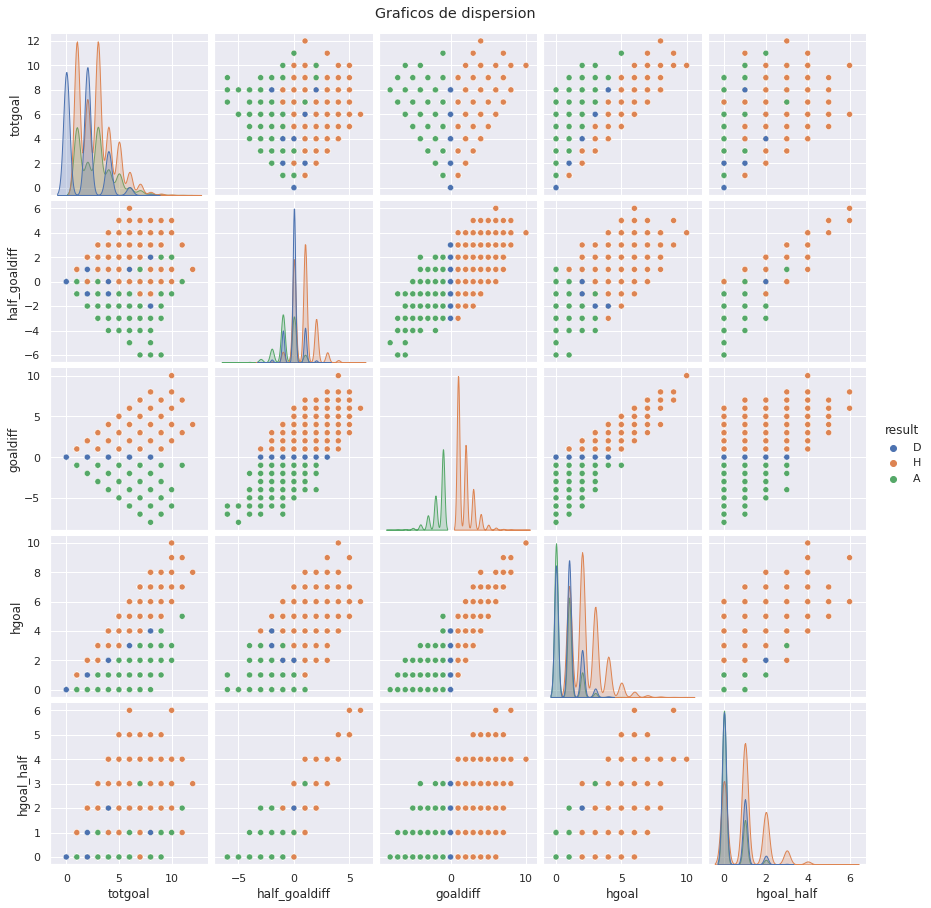

In [89]:
dfgraf= df[['totgoal', 'half_goaldiff', 'goaldiff', 'hgoal', 'hgoal_half', 'home', 'visitor', 'result']]
dfgraf

plt.figure(figsize=(16, 10))
g = sns.pairplot(dfgraf, hue='result')
g.fig.suptitle("Graficos de dispersion", y=1.01);

*  La variable goaldiff separa claramente nuestro valor target (result) entre positivos (gana home), y negativo (gana away)
*   Mayor cantidad de goles en los partidos ganados por el local.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


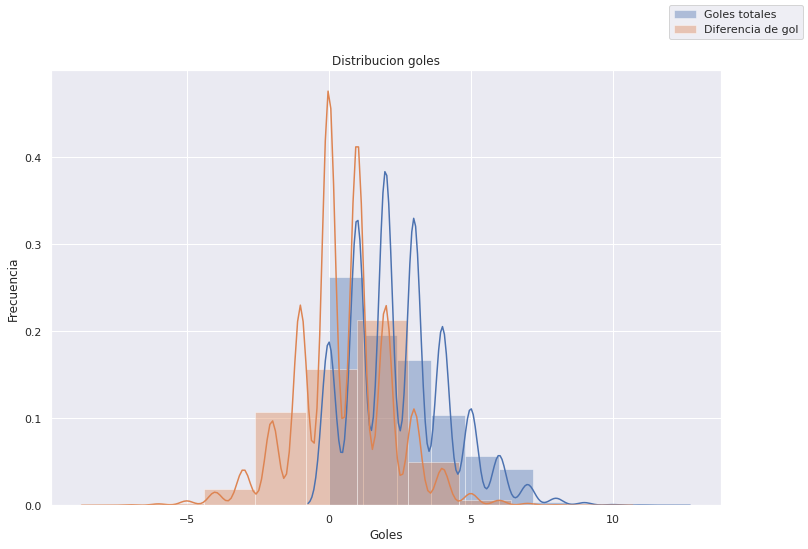

In [90]:
fig = plt.figure(figsize=(12,8))

sns.distplot(df.totgoal, kde=True, hist=True, bins= 10, label='Goles totales')
sns.distplot(df.goaldiff, kde=True, hist=True, bins= 10, label='Diferencia de gol')

fig.legend()
plt.xlabel('Goles')
plt.ylabel('Frecuencia')
plt.title('Distribucion goles')

plt.show();

In [91]:
fig = px.scatter(df, x="totgoal", y="goaldiff",color='result')
fig.show()

In [92]:
fig = px.scatter_3d(df, x="totgoal", y="goaldiff",z='Season',color='result', title='Grafico 3d Goles-Diferencia-Totales-Temporada x resultado')
fig.show()

Se observa mayor cantidad de goles en las temporadas y diferencia de gol por partido entre las temporadas del 1990 y 2000 aproximadamente

In [93]:
fig = px.box(df, x="totgoal", y="Season", points="all", title = ('Goles por temporada'))
fig.show()

 se vuelve a observar aquello de que a hay mayor cantidad de goles entre 1990, incluso algunos años antes, y el año 2000

In [94]:
fig = px.scatter(df, x="Season", y="goaldiff",color='result',size='totgoal', title=('Goles - resultado - por temporada y diferencia de gol'))
fig.show()

Se observan los casos atipicos de grandes cantidad de goles y mayores diferencia de gol. Como resultados 10 a 0; o 8 goles totales y sin dierencia de gol (empate 4 a 4)

# **Preparación de dataset para el entrenamiento.**

En pos de tener los datos de los equipos de manera actual, hemos decidido achicar el tamaño del dataset tomando los años más actuales del mismo, de manera de tener datos más acercado al comportamiento actual de cada equipo. Si bien diez años es bastante tiempo, lo que se busca es un equilibrio con la cantidad de datos para entrenar el algoritmo. Ya que si tomamos menos años, el rendimiento del mismo, disminiye. 

In [95]:
df1=df #realizamos una guarda del dataframe original para resguardo
corte2010= df[df['Season']<2010].index #hacemos un corte por la temporada 2010   
dfcorto=df.drop(corte2010) # dropeamos de 2010 para abajo
dfcorto

,Date,Season,Week,home,visitor,FT,hgoal,vgoal,division,tier,...,HT,hgoal_half,vgoal_half,half_totgoal,half_goaldiff,result_half,fans,neutral,home_red_card,visitor_red_card
14814,2010-08-14,2010,1,Gaziantepspor,Kasimpasa,0-0,0,0,T1,1,...,0-0,0,0,0,0,D,1,0,0,0
14815,2010-08-14,2010,1,Sivasspor,Galatasaray,2-1,2,1,T1,1,...,1-1,1,1,2,0,D,1,0,0,0
14816,2010-08-14,2010,1,Bucaspor,Besiktas,0-1,0,1,T1,1,...,0-0,0,0,0,0,D,1,0,1,0
14817,2010-08-14,2010,1,Eskisehirspor,Genclerbirligi,0-0,0,0,T1,1,...,0-0,0,0,0,0,D,1,0,0,0
14818,2010-08-15,2010,1,MKE Ankaragucu,Trabzonspor,0-2,0,2,T1,1,...,0-0,0,0,0,0,D,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18074,10/01/2021,2020,18,Caykur Rizespor,Denizlispor,1-1,1,1,T1,1,...,0-1,0,1,1,-1,A,0,0,0,0
18075,10/01/2021,2020,18,Hatayspor,Besiktas,2-2,2,2,T1,1,...,2-2,2,2,4,0,D,0,0,0,0
18076,11/01/2021,2020,18,BB Erzurumspor,Fenerbahce,0-3,0,3,T1,1,...,0-1,0,1,1,-1,A,0,0,0,0
18077,11/01/2021,2020,18,Alanyaspor,Kasimpasa,1-2,1,2,T1,1,...,1-2,1,2,3,-1,A,0,0,0,1


Renombramos el dataframe tomando del dfcorto (2010 en adelante) solo las variables que vamos a utilizar (HOME, VISITOR, HGOAL, VGOAL, RESULT Y SEASON)

In [96]:
df = dfcorto[['home', 'visitor', 'hgoal', 'vgoal', 'result', 'Season']]
df

,home,visitor,hgoal,vgoal,result,Season
14814,Gaziantepspor,Kasimpasa,0,0,D,2010
14815,Sivasspor,Galatasaray,2,1,H,2010
14816,Bucaspor,Besiktas,0,1,A,2010
14817,Eskisehirspor,Genclerbirligi,0,0,D,2010
14818,MKE Ankaragucu,Trabzonspor,0,2,A,2010
...,...,...,...,...,...,...
18074,Caykur Rizespor,Denizlispor,1,1,D,2020
18075,Hatayspor,Besiktas,2,2,D,2020
18076,BB Erzurumspor,Fenerbahce,0,3,A,2020
18077,Alanyaspor,Kasimpasa,1,2,A,2020


Realizamos un label encoder de las variables categóricas

In [97]:
le = preprocessing.LabelEncoder()
# label enconder de la columna result
df.result = le.fit_transform(df.result)
#label encoder de las columnas visitor y home
df.home = le.fit_transform(df.home)
df.visitor = le.fit_transform(df.visitor)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,home,visitor,hgoal,vgoal,result,Season
14814,18,23,0,0,1,2010
14815,33,16,2,1,2,2010
14816,8,7,0,1,0,2010
14817,13,19,0,0,1,2010
14818,27,34,0,2,0,2010


In [98]:
elocal= np.array(df['home'].unique()) #lista de equipos
print('Equipos locales')
print(elocal)
print('Equipos visitantes')
evisitante=df['visitor'].unique()
print(evisitante)

Equipos locales
[18 33  8 13 27 22 15  6  9 25 26  7  3 19 28 16 23 34 32 30 29 12  1 10
 24  5 31  0  2 20 35  4 11 17 14 21]
Equipos visitantes
[23 16  7 19 34 28  3 25 26 22 13  6 33 18 27  9  8 15 29 30 32  1 12 24
 10  5 31  2  0 35 20  4 17 11 14 21]


In [99]:
hgoal_esperado=[] #cramos un array para guardar luego las medias que se van generando en el loop posterior

In [100]:
elocal

array([18, 33,  8, 13, 27, 22, 15,  6,  9, 25, 26,  7,  3, 19, 28, 16, 23,
       34, 32, 30, 29, 12,  1, 10, 24,  5, 31,  0,  2, 20, 35,  4, 11, 17,
       14, 21])

In [101]:

for i in range(np.array(elocal.shape[0])): #loop entre el array de equipos genera la mediana de los hgoal esperados
  home_df = df[df['home']==i]
  home_total= statistics.median(home_df['hgoal'])
  hgoal_esperado.append(home_total)

esperadoslocal= pd.DataFrame() #dataframe vacío para cargar con los datos del loop y lista de equipo
esperadoslocal['home']= elocal
esperadoslocal['hgoal_esperado']= hgoal_esperado

esperadoslocal.head() #equipo y media de gol esperado por partido local

,home,hgoal_esperado
0,18,1.0
1,33,1.0
2,8,1.0
3,13,1.0
4,27,1.0


In [102]:
vgoal_esperado=[]

for i in range(np.array(elocal.shape[0])): #loop de entre el array de equipos genera la mediana de los hgoal esperados
  visitor_df = df[df['visitor']==i]
  visitor_total= statistics.median(visitor_df['vgoal'])
  vgoal_esperado.append(visitor_total)


esperadoslocal['vgoal_esperado']= vgoal_esperado
esperadoslocal.head(5)

,home,hgoal_esperado,vgoal_esperado
0,18,1.0,1.0
1,33,1.0,1.0
2,8,1.0,1.0
3,13,1.0,1.0
4,27,1.0,1.0


In [103]:
goal_delvistante=[]

for i in range(np.array(elocal.shape[0])): #loop de entre el array de equipos genera la mediana de los hgoal esperados
  home_dfv = df[df['home']==i]
  home_totalrecibe= statistics.median(home_dfv ['vgoal'])
  goal_delvistante.append(home_totalrecibe)

esperadoslocal['goal_delvistante']= goal_delvistante
esperadoslocal.head(5)

,home,hgoal_esperado,vgoal_esperado,goal_delvistante
0,18,1.0,1.0,2.0
1,33,1.0,1.0,1.0
2,8,1.0,1.0,1.0
3,13,1.0,1.0,1.0
4,27,1.0,1.0,1.0


In [104]:
goal_del_local=[]

for i in range(np.array(elocal.shape[0])): #loop de entre el array de equipos genera la mediana de los hgoal esperados
  visitor_dfv = df[df['visitor']==i]
  visitante_totalrecibe= statistics.median(home_dfv ['hgoal'])
  goal_del_local.append(visitante_totalrecibe)

esperadoslocal['goal_del_local']= goal_del_local
esperadoslocal.tail(5)

,home,hgoal_esperado,vgoal_esperado,goal_delvistante,goal_del_local
31,4,1.0,1.0,1.0,1
32,11,1.0,0.0,1.0,1
33,17,1.0,1.0,1.0,1
34,14,2.0,1.0,1.0,1
35,21,1.0,1.0,1.0,1


In [105]:
#creaos diccionarios agrupando los valores de las variables generadas
#por la variable home (la lista de equipo)
dicc_hgoal_esperado = esperadoslocal.groupby("home")["hgoal_esperado"].apply(float).to_dict()
dicc_vgoal_esperado = esperadoslocal.groupby("home")["vgoal_esperado"].apply(float).to_dict()
dicc_goles_del_visitante = esperadoslocal.groupby("home")["goal_delvistante"].apply(float).to_dict()
dicc_goles_del_local = esperadoslocal.groupby("home")["goal_del_local"].apply(float).to_dict()

#luego usamos la función map para asigar a la nueva columna generada el valor que le corresponde
#en cada diccionario
df['goles_espados_local'] = df['home'].map(dicc_hgoal_esperado)
df['goles_espados_de_visitante'] = df['home'].map(dicc_vgoal_esperado)
df['goles_del_visitante'] = df['home'].map(dicc_goles_del_visitante)
df['goles_del_local'] = df['home'].map(dicc_goles_del_local)

df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,home,visitor,hgoal,vgoal,result,Season,goles_espados_local,goles_espados_de_visitante,goles_del_visitante,goles_del_local
14814,18,23,0,0,1,2010,1.0,1.0,2.0,1.0
14815,33,16,2,1,2,2010,1.0,1.0,1.0,1.0
14816,8,7,0,1,0,2010,1.0,1.0,1.0,1.0
14817,13,19,0,0,1,2010,1.0,1.0,1.0,1.0
14818,27,34,0,2,0,2010,1.0,1.0,1.0,1.0
14819,22,28,2,1,2,2010,1.0,1.0,2.0,1.0
14820,15,3,4,0,2,2010,2.0,1.0,1.0,1.0
14821,6,25,0,2,0,2010,2.0,1.0,1.0,1.0
14822,9,26,1,0,2,2010,1.0,0.0,1.0,1.0
14823,25,22,1,0,2,2010,1.0,1.0,1.0,1.0


Eliminamos las variables hgoal y vgoal - no las tendremos previamente al partido, por lo que no nos sirven para el entrenamiento del algoritmo -

In [106]:
df = df.drop(['hgoal'], axis=1)
df = df.drop(['vgoal'], axis=1)

Realizamos una nueva matriz de correlación con las nuevas variables creadas.

In [107]:
matrix_correlation = df.corr() #corr pearson por default
print("Matris de correlacion de variables numéricas")
matrix_correlation

Matris de correlacion de variables numéricas


,home,visitor,result,Season,goles_espados_local,goles_espados_de_visitante,goles_del_visitante,goles_del_local
home,1.000000,-0.041997,-0.049967,-0.048082,0.030740,0.065425,-0.092472,NaN
visitor,-0.041997,1.000000,0.042989,-0.050438,-0.008096,-0.003432,-0.000420,NaN
result,-0.049967,0.042989,1.000000,-0.005137,0.120349,0.019066,-0.042437,NaN
Season,-0.048082,-0.050438,-0.005137,1.000000,0.002054,-0.056703,-0.045128,NaN
goles_espados_local,0.030740,-0.008096,0.120349,0.002054,1.000000,0.164040,-0.232946,NaN
goles_espados_de_visitante,0.065425,-0.003432,0.019066,-0.056703,0.164040,1.000000,0.100157,NaN
goles_del_visitante,-0.092472,-0.000420,-0.042437,-0.045128,-0.232946,0.100157,1.000000,NaN
goles_del_local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observamos que la variable goles_del_local no tiene correlación - por ello, lo quitaremos. 

In [108]:
df = df.drop(['goles_del_local'], axis=1)

Separamos en dataset en dos. Dejando el dataset sin nuestra variable target (RESULT) por un lado y por el otro solo la varaible target.

In [109]:
#Separamos en X e y  NUESTRA VARIABLE TARGES ES RESULT
X = df.drop(["result"], axis=1)
y = df["result"]

Luego volvemos a separar X e Y en dos: train y test.

In [110]:
#Separamos en train y test!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Como pudimos observar arriba, la variable target result se encuentra desbalanceada y en atención a ello, debemos balancear los datos para poder realizar una predicción más correcta.

In [111]:
print(df.groupby('result').size()) #proporciones de los resultados de result

result
0     930
1     841
2    1494
dtype: int64


Para balancear la data - probaremos realizando un OVERSAMPLING con el metodo SMOTE (Técnica de sobremuestreo de minorías sintéticas)

In [112]:
oversample = SMOTE(random_state=42)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train) #generamos dos nuevos x e y aplicando el algoritmo smote

print("distribucion normal del dataset: {}".format(Counter(df['result'])))
print("distrubición con SMOTE del dataset: {}".format(Counter(y_train_over)))

distribucion normal del dataset: Counter({2: 1494, 0: 930, 1: 841})
distrubición con SMOTE del dataset: Counter({1: 1183, 2: 1183, 0: 1183})


Con las nuevas X e Y que se encuentran balanceadas realizaremos entrenamientos para comparar los resultados

# **Entrenamientos de modelos**

**XGBClassifier**

---



Entrenamos el modelo con las X e Y con oversampling

In [113]:
model = XGBClassifier(use_label_encoder=False, random_state=42) #entrenamiento del modelo
model.fit(X_train_over, y_train_over)

XGBClassifier(objective='multi:softprob', random_state=42,
              use_label_encoder=False)

In [114]:
model.set_params

<bound method XGBModel.set_params of XGBClassifier(objective='multi:softprob', random_state=42,
              use_label_encoder=False)>

In [115]:
model.get_booster().get_score(importance_type='weight') #importancia de las variables en el algoritmo

{'goles_espados_local': 111,
 'visitor': 681,
 'home': 560,
 'goles_espados_de_visitante': 122,
 'goles_del_visitante': 183,
 'Season': 332}

In [116]:
y_pred = model.predict(X_test) #predicción

In [117]:
accuracy = accuracy_score(y_test, y_pred) 
accuracy #acccuracy del agoritmo entrenado

0.48085758039816234

In [118]:
print(confusion_matrix(y_test, y_pred)) #Matriz de confusión 

[[ 91  36  64]
 [ 38  38  75]
 [ 72  54 185]]


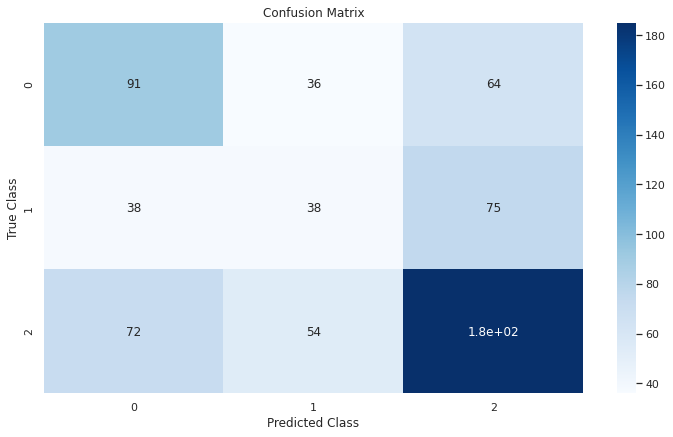

In [119]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=1, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [120]:
print(classification_report(y_test, y_pred)) # reporte 

              precision    recall  f1-score   support

           0       0.45      0.48      0.46       191
           1       0.30      0.25      0.27       151
           2       0.57      0.59      0.58       311

    accuracy                           0.48       653
   macro avg       0.44      0.44      0.44       653
weighted avg       0.47      0.48      0.48       653



Accuracy de 0.48 - se obseva que la variable empate (1) es la de peor score, recal y precisión.

**RANDOM FOREST CLASFFIER**

---



In [121]:
# Crear el modelo con 150 arboles
rforrest = RandomForestClassifier(n_estimators=150, verbose=1, random_state=42)

Entrenamos el modelo con las X e Y con oversampling

In [122]:
rforrest.fit(X_train_over, y_train_over); #entrenamos el modelo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


In [123]:
rforrest.feature_importances_

array([0.20947113, 0.4185115 , 0.27879527, 0.04982814, 0.01949744,
       0.02389651])

importancia y peso en la prediccion de las variables

In [124]:
#importancia de las variables en el modelo
print('Importancia de las varaibles en el modelo Random Forest')
print(rforrest.feature_names_in_[0],":",rforrest.feature_importances_[0])
print(rforrest.feature_names_in_[1],":",rforrest.feature_importances_[1])
print(rforrest.feature_names_in_[2],":",rforrest.feature_importances_[2])
print(rforrest.feature_names_in_[3],":",rforrest.feature_importances_[3])
print(rforrest.feature_names_in_[4],":",rforrest.feature_importances_[4])
print(rforrest.feature_names_in_[5],":",rforrest.feature_importances_[5])

Importancia de las varaibles en el modelo Random Forest
home : 0.20947113237285805
visitor : 0.41851149574304963
Season : 0.2787952702844719
goles_espados_local : 0.04982814253659731
goles_espados_de_visitante : 0.019497444264494904
goles_del_visitante : 0.02389651479852808


Feature: 0, Score: 0.20947
Feature: 1, Score: 0.41851
Feature: 2, Score: 0.27880
Feature: 3, Score: 0.04983
Feature: 4, Score: 0.01950
Feature: 5, Score: 0.02390


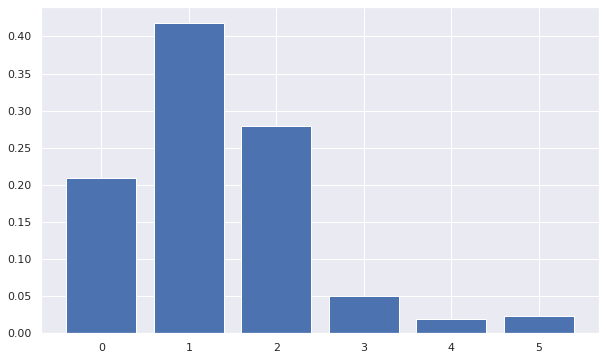

In [125]:
from matplotlib import pyplot

# get importance
importance = rforrest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Precisión del modelo

In [126]:
accuracy = accuracy_score(y_test, y_pred) #accuracy del modelo
accuracy

0.48085758039816234

Matriz de confusión del modelo 

In [127]:
print(confusion_matrix(y_test, y_pred))

[[ 91  36  64]
 [ 38  38  75]
 [ 72  54 185]]


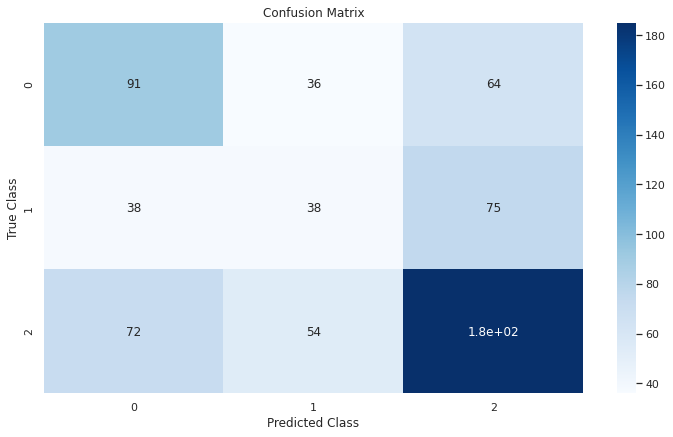

In [128]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=1, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Reporte del modelo

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.48      0.46       191
           1       0.30      0.25      0.27       151
           2       0.57      0.59      0.58       311

    accuracy                           0.48       653
   macro avg       0.44      0.44      0.44       653
weighted avg       0.47      0.48      0.48       653



f1-score y valores idénticos al sxgboot clasificador.

**REGRESIÓN LOGISTICA**

---



Generamos el modelo de regresión logistica y lo entrenamos con los X e Y con oversampling

In [130]:
model_lg = linear_model.LogisticRegression(max_iter=3000, random_state=42, class_weight='balanced')
model_lg.fit(X_train_over, y_train_over)

LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)

Realizamos la predicción con el modelo entrenado

In [131]:
y_pred = model_lg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.41347626339969373


Matriz de confusión del modelo

In [132]:
print(confusion_matrix(y_test, y_pred))

[[ 97  33  61]
 [ 73  38  40]
 [114  62 135]]


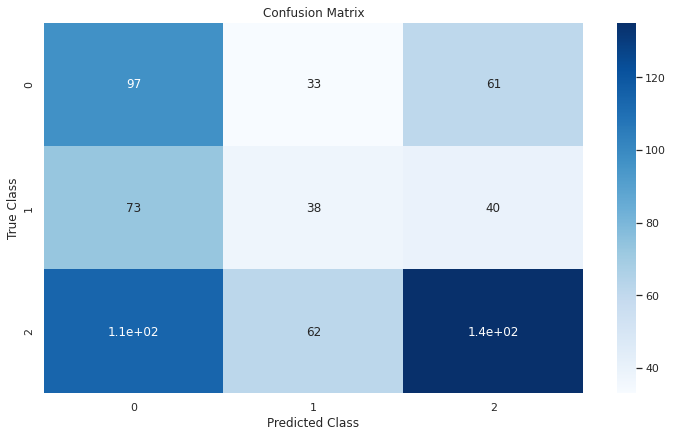

In [133]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=1, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Reporte del modelo.

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.51      0.41       191
           1       0.29      0.25      0.27       151
           2       0.57      0.43      0.49       311

    accuracy                           0.41       653
   macro avg       0.40      0.40      0.39       653
weighted avg       0.44      0.41      0.42       653



La regresión tiene valores de f1-score y demás, bastante peores que los de los algoritmos anteriores.

**Arbol de decisión -**

---



Creamos un arbol de decisión sencillo y lo entrenamos con los X e Y con oversampling

In [135]:
#Creamos un arbol de decisión sencillo y lo fiteamos
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
tree.fit(X_train_over, y_train_over)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

Realizamos la predicción con el X_test (porción de testeo)

In [136]:
y_test_pred = tree.predict(X_test) #Prediccion en Test

hacemos el text de precisión.

In [137]:
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.40428790199081166


Matriz de confusión

In [138]:
confusion_matrix(y_test, y_test_pred)

array([[ 76,  48,  67],
       [ 41,  47,  63],
       [ 88,  82, 141]])

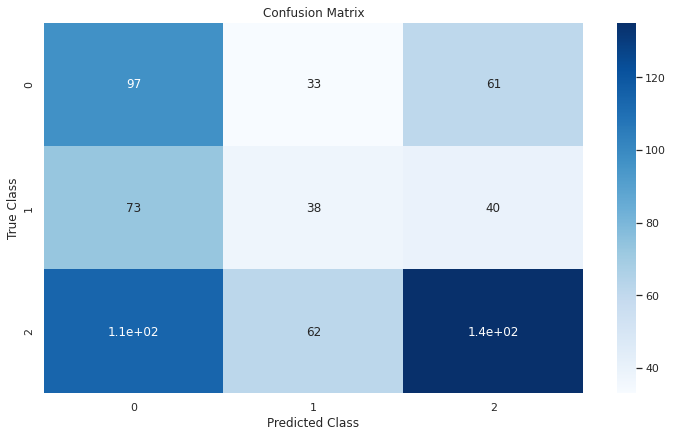

In [139]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=1, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Reporte del algoritmo

In [140]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.37      0.40      0.38       191
           1       0.27      0.31      0.29       151
           2       0.52      0.45      0.48       311

    accuracy                           0.40       653
   macro avg       0.39      0.39      0.38       653
weighted avg       0.42      0.40      0.41       653



Aún cuando mejorar respecto de la regresion logística, el arbol de decisión tiene peores métricas que los dos primeros (xgboost clasificador y Random Tree).

# **Optimización modelo - hiperparámetros**

---



Nos proponemos buscar los mejores hiperparámetros para el algoritmo elegido

In [141]:
#todos los resultados los vamos a guardar para luego comparar al final
results = {}

#variables comunes
semilla = 42
seed_search_cv = 123
cv = 8
n_iter = 30

In [142]:
#MAE train
mean_absolute_error(y_test, rforrest.predict(X_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


0.8131699846860643

Optimización bayesiana de los hiperparámetros del Algoritmo elegido.

In [143]:
# Bayesian

param_grid = {
    "max_features": [0.3, 0.5, 0.7, 1],
    "n_estimators": (100,  800) , #manera diferente de verificar , asi se escribe una lista de valores
    "max_depth": (4, 400),
}

reg_bay = BayesSearchCV(RandomForestClassifier(random_state=42),
                    search_spaces=param_grid,
                    n_iter=n_iter,
                    cv=6,
                    n_jobs=-1,
                    scoring='neg_mean_absolute_error',
                    random_state=42)

#start_time = time.time()

model_bay = reg_bay.fit(X_train_over, y_train_over)

#end_time = time.time()

In [144]:
model_bay.best_params_

OrderedDict([('max_depth', 18), ('max_features', 0.5), ('n_estimators', 601)])

Mejor parámetro determinado según según el bayesiano par el Random Forrest:
([('max_depth', 18), ('max_features', 0.5), ('n_estimators', 601)])

In [145]:
results['bayesian'] = { 
                   'score_train': max(pd.DataFrame(model_bay.cv_results_)['mean_test_score'])*-1, 
                   'score_test':mean_absolute_error(y_test, model_bay.predict(X_test)) , 
                   'n_trainings': pd.DataFrame(model_bay.cv_results_).shape[0] * 3}

In [146]:
results

{'bayesian': {'score_train': 0.6102336473529367,
  'score_test': 0.8131699846860643,
  'n_trainings': 90}}

In [147]:
modelmejor = RandomForestClassifier(n_estimators=601, verbose=1, random_state=42, bootstrap=True, max_depth=18, max_features=0.5)

In [148]:
modelmejor.fit(X_train_over, y_train_over)
y_predmejor = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predmejor)
accuracy

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 601 out of 601 | elapsed:    1.8s finished


0.48085758039816234

In [149]:
print(confusion_matrix(y_test, y_predmejor))

[[ 91  36  64]
 [ 38  38  75]
 [ 72  54 185]]


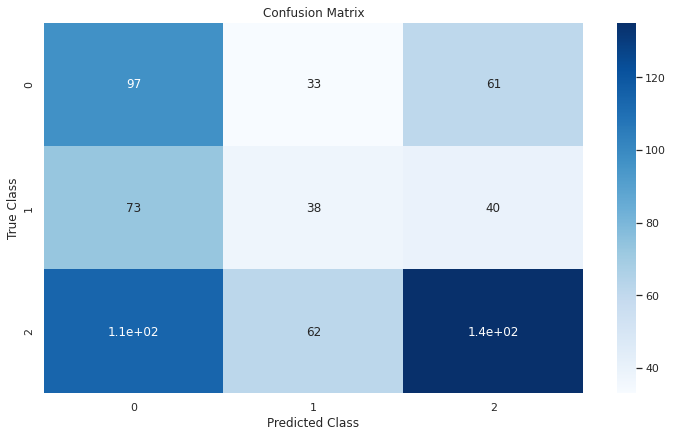

In [150]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=1, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [151]:
print(classification_report(y_test, y_predmejor))

              precision    recall  f1-score   support

           0       0.45      0.48      0.46       191
           1       0.30      0.25      0.27       151
           2       0.57      0.59      0.58       311

    accuracy                           0.48       653
   macro avg       0.44      0.44      0.44       653
weighted avg       0.47      0.48      0.48       653



Luego de sumar variables, realizar un oversampling y de optimizar los hiperparámetros. Hemos logrados mejor notablemente los valores de precision, recall y f1-score del entrenamiento. 
De igual modo los valores no son los esperados.

# CONCLUSIÓN

Habiendo realizado un trabajo minucioso sobre el dataset, entregando algoritmos, realizado oversampling para balancear la variable target. Habiendo tenido que descartar la mayoría de las variables por no ser posible contar con ellas antes del partido (y poder realizar una predicción del mismo), podemos concluir diciendo que, la métrica final del algoritmo predictivo no es la deseada, aunque, creemos que la información con la que contamos en dicho dataset no suficiente como para alcanzar el objetivo planteado al principio de nuestro trabajo. Aun así, podemos decir, que dentro de las posibilidades que nos brinda el dataset, hemos alcanzado un algoritmo correctamente entrenado y adecuado 

# LINEA FUTURA

En atención a que no hemos podido lograr con los algoritmos estudiados un resultado que nos resultara del todo satisfactorio, hemos indagado sobre distintas formas de tratar el problema de la predicción de resultados deportivos. En ello, hemos encontrado el siguiente algoritmo que desarrollamos seguidamente.

In [152]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import poisson

In [153]:
dfp = pd.read_csv('tsl_dataset.csv') #CARGAMOS EL DATASET
dfp.tail()

,Date,Season,Week,home,visitor,FT,hgoal,vgoal,division,tier,...,HT,hgoal_half,vgoal_half,half_totgoal,half_goaldiff,result_half,fans,neutral,home_red_card,visitor_red_card
18074,10/01/2021,2020,18,Caykur Rizespor,Denizlispor,1-1,1,1,T1,1,...,0-1,0,1,1,-1,A,0,0,0,0
18075,10/01/2021,2020,18,Hatayspor,Besiktas,2-2,2,2,T1,1,...,2-2,2,2,4,0,D,0,0,0,0
18076,11/01/2021,2020,18,BB Erzurumspor,Fenerbahce,0-3,0,3,T1,1,...,0-1,0,1,1,-1,A,0,0,0,0
18077,11/01/2021,2020,18,Alanyaspor,Kasimpasa,1-2,1,2,T1,1,...,1-2,1,2,3,-1,A,0,0,0,1
18078,15/01/2021,2020,19,Genclerbirligi,Fatih Karagumruk,1-3,1,3,T1,1,...,0-2,0,2,2,-2,A,0,0,0,0


Volvemos a cargar el dataset de cero.

In [154]:
dfp['Season'].unique() # todas las temporadas del dataset

array([1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

En razón de que, en este tipo de predicción importa la actualidad y no tanto la historia de los equipos, haremos un corte de los últimos 3 años.

In [155]:
corte2015= dfp[dfp['Season']<2018].index
dfcorto=dfp.drop(corte2015)
dfcorto.head(10)

,Date,Season,Week,home,visitor,FT,hgoal,vgoal,division,tier,...,HT,hgoal_half,vgoal_half,half_totgoal,half_goaldiff,result_half,fans,neutral,home_red_card,visitor_red_card
17286,2018-08-10,2018,1,MKE Ankaragucu,Galatasaray,1-3,1,3,T1,1,...,1-2,1,2,3,-1,A,1,0,0,0
17287,2018-08-11,2018,1,Fenerbahce,Bursaspor,2-1,2,1,T1,1,...,2-1,2,1,3,1,H,1,0,0,0
17288,2018-08-11,2018,1,Caykur Rizespor,Kasimpasa,2-3,2,3,T1,1,...,1-0,1,0,1,1,H,1,0,0,0
17289,2018-08-11,2018,1,Sivasspor,Alanyaspor,1-0,1,0,T1,1,...,0-0,0,0,0,0,D,1,0,0,0
17290,2018-08-12,2018,1,Basaksehir FK,Trabzonspor,2-0,2,0,T1,1,...,1-0,1,0,1,1,H,1,0,0,0
17291,2018-08-12,2018,1,Konyaspor,BB Erzurumspor,3-2,3,2,T1,1,...,2-1,2,1,3,1,H,1,0,0,0
17292,2018-08-12,2018,1,Goztepe,Yeni Malatyaspor,1-3,1,3,T1,1,...,0-1,0,1,1,-1,A,1,0,2,1
17293,2018-08-12,2018,1,Besiktas,Akhisarspor,2-1,2,1,T1,1,...,2-0,2,0,2,2,H,1,0,0,0
17294,2018-08-13,2018,1,Kayserispor,Antalyaspor,2-0,2,0,T1,1,...,1-0,1,0,1,1,H,1,0,0,1
17295,2018-08-17,2018,2,Trabzonspor,Sivasspor,3-1,3,1,T1,1,...,3-1,3,1,4,2,H,1,0,0,0


*Creamos* un nuevo dataset: "goal_model_data". En el que ponemos el equipo, el oponente y la cantidad de goles que hace el equipo. Y la variable local, tipo booleanda donde 1 quiere decir que es local y cero quiere decir que es visitante.

In [156]:
goal_model_data = pd.concat([dfcorto[['home','visitor','hgoal']].assign(local=1).rename(
            columns={'home':'team', 'visitor':'opponent','hgoal':'goals'}),
           dfcorto[['visitor','home','vgoal']].assign(local=0).rename(
            columns={'visitor':'team', 'home':'opponent','vgoal':'goals'})])

In [157]:
goal_model_data

,team,opponent,goals,local
17286,MKE Ankaragucu,Galatasaray,1,1
17287,Fenerbahce,Bursaspor,2,1
17288,Caykur Rizespor,Kasimpasa,2,1
17289,Sivasspor,Alanyaspor,1,1
17290,Basaksehir FK,Trabzonspor,2,1
...,...,...,...,...
18074,Denizlispor,Caykur Rizespor,1,0
18075,Besiktas,Hatayspor,2,0
18076,Fenerbahce,BB Erzurumspor,3,0
18077,Kasimpasa,Alanyaspor,2,0


Entrenamos un modelo Poisson - en formula va primero la variable dependiente  y luego del ~ las variables independientes que actuaran en la regresión del modelo. En este caso realizaremos sobre la variable target GOALS


In [158]:
poisson_model = smf.glm(formula="goals ~ local + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit() #entrenamos el modelo posion

Este entrenamiento de regresión lineal - Model Family: Poisson. Una lista de cada equipo tanto como team como opponent. En cada uno tiene un coeficiente

In [159]:
poisson_model.summary() #el model poison de nuestra base de datos.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                 1586
Model:                            GLM   Df Residuals:                     1540
Model Family:                 Poisson   Df Model:                           45
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2286.0
Date:                Mon, 29 Aug 2022   Deviance:                       1692.2
Time:                        18:37:24   Pearson chi2:                 1.47e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.0116      0.224     -0.052      0.959      -0.450       0.427
team[T.Alanyaspor]               0.3933      0.196      2.009      0.045       0.010       0.777
team[T.Antalyaspor]              0.1564      0.201      0.776      0.437      -0.238       0.551
team[T.BB Erzurumspor]           0.0195      0.223      0.087      0.930      -0.417       0.456
team[T.Basaksehir FK]            0.4844      0.194      2.495      0.013       0.104       0.865
team[T.Besiktas]                 0.6983      0.191      3.664      0.000       0.325       1.072
team[T.Bursaspor]               -0.1862      0.257     -0.724      0.469      -0.690       0.318
team[T.Caykur Rizespor]          0.2557      0.199      1.283      0.199      -0.135       0.646
team[T.Denizlispor]             -0.0537      0.227     -0.237      0.813      -0.498       0.390
team[T.Fatih Karagumruk]         0.5207      0.253      2.060      0.039       0.025       1.016
team[T.Fenerbahce]               0.4938      0.194      2.541      0.011       0.113       0.875
team[T.Galatasaray]              0.6346      0.191      3.315      0.001       0.259       1.010
team[T.Gaziantep FK]             0.4640      0.207      2.237      0.025       0.057       0.871
team[T.Genclerbirligi]           0.1259      0.219      0.576      0.565      -0.302       0.554
team[T.Goztepe]                  0.1898      0.201      0.946      0.344      -0.203       0.583
team[T.Hatayspor]                0.3856      0.266      1.451      0.147      -0.135       0.906
team[T.Kasimpasa]                0.4228      0.196      2.157      0.031       0.039       0.807
team[T.Kayserispor]              0.0305      0.205      0.149      0.882      -0.372       0.432
team[T.Konyaspor]                0.1727      0.201      0.859      0.390      -0.221       0.567
team[T.MKE Ankaragucu]           0.0660      0.204      0.323      0.747      -0.334       0.466
team[T.Sivasspor]                0.3768      0.196      1.918      0.055      -0.008       0.762
team[T.Trabzonspor]              0.6363      0.192      3.321      0.001       0.261       1.012
team[T.Yeni Malatyaspor]         0.2880      0.198      1.452      0.147      -0.101       0.677
opponent[T.Alanyaspor]          -0.3573      0.170     -2.096      0.036      -0.691      -0.023
opponent[T.Antalyaspor]         -0.0466      0.162     -0.288      0.773      -0.364       0.271
opponent[T.BB Erzurumspor]      -0.0923      0.178     -0.518      0.605      -0.442       0.257
opponent[T.Basaksehir FK]       -0.4760      0.175     -2.723      0.006      -0.819      -0.133
opponent[T.Besiktas]            -0.2071      0.167     -1.238      0.216      -0.535       0.121
opponent[T.Bursaspor]           -0.3852      0.214     -1.803      0.071    

Pasamos a nuestros equipos poisson_model y devolverá el número promedio esperado de goles para ese equipo (o local o visitante), por lo que debemos correr la predicción para cada equipo

In [160]:
poisson_model.predict(pd.DataFrame(data={'team': 'Galatasaray', 'opponent': 'Besiktas',
                                       'local':1},index=[1]))

1    1.984788
dtype: float64

de local, Galatasaray hace 1.98 goles de promedio de local frente al Besiktas

In [161]:
poisson_model.predict(pd.DataFrame(data={'team': 'Besiktas', 'opponent': 'Galatasaray',
                                       'local':0},index=[1]))

1    1.303774
dtype: float64

se espera 1.30 gol por partido de visitante del Besiktas frente al Galatasaray

Predecimos los goles de Galatasaray de local contra otro equipo de menor envergadura, para ver el comportamiento del algoritmo.

In [162]:
poisson_model.predict(pd.DataFrame(data={'team': 'Galatasaray', 'opponent': 'Antalyaspor',
                                       'local':1},index=[1]))

1    2.330362
dtype: float64

Como vemos se espera 2.3 goles del Galatasaray frente al Antalyaspor. Es decir, se esperan más goles que contra un equipo como el Beksitas

Modeo de simulación de partido (porcentaje de que gane un equipo). 

In [163]:
#creamos una funcion que devuelva una array con los porcentaje de que realicen un maximo de goles por equipo
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'local':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'local':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

Hasta aquí nuestro algoritmo nos daba cuantos goles se esperaba de un equipo en un partido. Con esta funcion logramos determinar la probabilidad de que gane uno u otro equipo

*simulamos y mostramos la matriz de un partido que tiene hasta tres goles por equipo**


*   La diagonal del array significa la probabilidad de que ambos equipos hagan la misma cantidad de goles arrancando en cero y termianndo en un tres a tres.
*   De dicha diagonal para abajo, son las veces que el equipo local hará más goles que el visitante, empezando en 1 y terminando en tres.

*   De dicha diagonal para arriba son las probabilidades de que el equipo visitante haga más goles que el local, empezando de 1 a 3

La probabilidad de que gane el local se da sumando todos los porcentajes de abajo de la diagonal
La probabilidad de que gane el visitante se da sumando todos los porcentajes de arriba de la diagonal.
Por último, la probabilidad de empate, se da sumando todos los valores de la diagonal del array.

In [164]:
simu3=simulate_match(poisson_model, 'Galatasaray', 'Antalyaspor', max_goals=3)
glocal=np.sum(np.tril(simu3, -1))
print(simu3,'\n')
print('probabilidad de que gane Galatasaray:', glocal)

[[0.0455627  0.03455035 0.01309982 0.00331121]
 [0.10617761 0.08051484 0.03052734 0.00771633]
 [0.12371616 0.09381438 0.03556988 0.00899092]
 [0.09610117 0.07287384 0.02763024 0.00698403]] 

probabilidad de que gane Galatasaray: 0.5203133927829013


Creamos una predicción de un partido usando la funcion simulate_match y le damos un maximo de 10 en el partido

In [165]:
simu=simulate_match(poisson_model, 'Galatasaray', 'Antalyaspor', max_goals=10)
glocal=np.sum(np.tril(simu, -1))
print('probabilidad de que gane Galatasaray:', glocal)

probabilidad de que gane Galatasaray: 0.7261639811542389


In [166]:
#empate - restamos del array el triangulo de abajo con lo que quedaría la linea diagonal del medio ( misma cantidad de goles)
empate= np.sum(np.tril(simu, 0)-np.tril(simu, -1))
print('probabilidad de empate:', empate)

probabilidad de empate: 0.1694601042634459


In [167]:
gvisitante=np.sum(np.triu(simu, 1))
print('probabilidad de que gane Eskisehirspor:', gvisitante)

probabilidad de que gane Eskisehirspor: 0.10434276986758594


Actuando con el mismo principio podemos determinar la probabilidad de que ocurran muchas mas cuestiones relacionadas con la probabilidad de la variable GOALS. 

In [168]:
print("más de 2.5 goles")
print(np.sum(simu[2:])+np.sum(simu[:2,2:])-np.sum(simu[2:3,0])-np.sum(simu[0:1,2]))
print("menos 2.5 goles")
print(np.sum(simu[:2,:2])+simu.item((0,2))+simu.item((2,0)))
print("Arco en cero local")
print(np.sum(simu[:,0]))
print("con Goles al local")
print(np.sum(simu[:,1:]))
print("arco en cero visitante")
print(np.sum(simu[:1]))
print("con goles al visitante")
print(np.sum(simu[1:]))
print("que anoten ambos equipos")
print(np.sum(simu[1:,1:]))
print("que salga cero a cero")
print(np.sum(simu[:1])+np.sum(simu[1:,0]))

más de 2.5 goles
0.5963453710870787
menos 2.5 goles
0.40362148419819177
Arco en cero local
0.4684450383372557
con Goles al local
0.5315218169480149
arco en cero visitante
0.09726048475059804
con goles al visitante
0.9027063705346727
que anoten ambos equipos
0.47982403386786004
que salga cero a cero
0.5201428214174106
